In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlite3

df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')
df.head()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2015   9/21/2001     SO45080         332        14657             1   
1  1/1/2015   12/5/2001     SO45079         312        29255             4   
2  1/1/2015  10/29/2001     SO45082         350        11455             9   
3  1/1/2015  11/16/2001     SO45081         338        26782             6   
4  1/2/2015  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  ...  \
0              1              1                      2  BK-R50B-58  ...   
1              1              1                      2  BK-R93R-48  ...   
2              1              1                      1  BK-M82B-44  ...   
3              1              1                      2  BK-R50B-44  ...   
4              1              1                      2  BK-R93R-48  ...   

     LastName   BirthDate MaritalStatus Gender  \
0      THOMAS  11/11/1958             M      M   
1  WASHINGTON   4/11/1955             S      M   
2        SANZ   4/21/1974             M      M   
3       LEWIS   9/25/1980             S      M   
4        CHEN   1/11/1965             S      M   

                     EmailAddress AnnualIncome  TotalChildren  \
0      john48@adventure-works.com      80000.0            1.0   
1       kyle8@adventure-works.com      80000.0            3.0   
2      ross38@adventure-works.com     100000.0            0.0   
3      seth20@adventure-works.com      30000.0            0.0   
4  alejandro4@adventure-works.com      20000.0            2.0   

    EducationLevel      Occupation  HomeOwner  
0  Partial College  Skilled Manual          N  
1  Partial College    Professional          N  
2      High School      Management          Y  
3      High School  Skilled Manual          N  
4      High School          Manual          Y  

[5 rows x 35 columns]

In [2]:
df.describe()

ProductKey   CustomerKey  TerritoryKey  OrderLineItem  OrderQuantity  \
count  56046.000000  56046.000000  56046.000000   56046.000000   56046.000000   
mean     438.962103  18843.645559      6.254666       1.903151       1.501873   
std      118.612352   5412.449843      2.958005       1.021006       0.612379   
min      214.000000  11000.000000      1.000000       1.000000       1.000000   
25%      360.000000  14016.000000      4.000000       1.000000       1.000000   
50%      479.000000  18157.000000      7.000000       2.000000       1.000000   
75%      529.000000  23425.750000      9.000000       2.000000       2.000000   
max      606.000000  29483.000000     10.000000       8.000000       3.000000   

       ProductSubcategoryKey   ProductCost  ProductPrice  ProductCategoryKey  \
count           56046.000000  56046.000000  56046.000000        56046.000000   
mean               23.412982    255.750403    438.969347            3.102576   
std                13.493235    496.192920    838.650049            1.258273   
min                 1.000000      0.856500      2.290000            1.000000   
25%                19.000000      2.973300      7.950000            3.000000   
50%                28.000000     11.216300     29.990000            4.000000   
75%                37.000000     59.466000    159.000000            4.000000   
max                37.000000   2171.294200   3578.270000            4.000000   

        AnnualIncome  TotalChildren  
count   56030.000000   56030.000000  
mean    59766.018205       1.843762  
std     33075.213900       1.619349  
min     10000.000000       0.000000  
25%     30000.000000       0.000000  
50%     60000.000000       2.000000  
75%     80000.000000       3.000000  
max    170000.000000       5.000000

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              56046 non-null  object 
 1   StockDate              56046 non-null  object 
 2   OrderNumber            56046 non-null  object 
 3   ProductKey             56046 non-null  int64  
 4   CustomerKey            56046 non-null  int64  
 5   TerritoryKey           56046 non-null  int64  
 6   OrderLineItem          56046 non-null  int64  
 7   OrderQuantity          56046 non-null  int64  
 8   ProductSubcategoryKey  56046 non-null  int64  
 9   ProductSKU             56046 non-null  object 
 10  ProductName            56046 non-null  object 
 11  ModelName              56046 non-null  object 
 12  ProductDescription     56046 non-null  object 
 13  ProductColor           29168 non-null  object 
 14  ProductSize            56046 non-null  object 
 15  Pr

In [4]:
mean_values = df.mean(axis = 0, numeric_only = True)
median_values = df.median(axis = 0, numeric_only = True)
std_values = df.std(axis = 0, numeric_only = True)
var_values = df.var(axis = 0, numeric_only = True)


In [5]:
pd.options.display.float_format = lambda x: '{:,.2f}'.format(x)
print(mean_values)


ProductKey                 438.96
CustomerKey             18,843.65
TerritoryKey                 6.25
OrderLineItem                1.90
OrderQuantity                1.50
ProductSubcategoryKey       23.41
ProductCost                255.75
ProductPrice               438.97
ProductCategoryKey           3.10
AnnualIncome            59,766.02
TotalChildren                1.84
dtype: float64


In [6]:
print(median_values)

ProductKey                 479.00
CustomerKey             18,157.00
TerritoryKey                 7.00
OrderLineItem                2.00
OrderQuantity                1.00
ProductSubcategoryKey       28.00
ProductCost                 11.22
ProductPrice                29.99
ProductCategoryKey           4.00
AnnualIncome            60,000.00
TotalChildren                2.00
dtype: float64


In [7]:
print(std_values)

ProductKey                 118.61
CustomerKey              5,412.45
TerritoryKey                 2.96
OrderLineItem                1.02
OrderQuantity                0.61
ProductSubcategoryKey       13.49
ProductCost                496.19
ProductPrice               838.65
ProductCategoryKey           1.26
AnnualIncome            33,075.21
TotalChildren                1.62
dtype: float64


In [8]:
print(var_values)

ProductKey                     14,068.89
CustomerKey                29,294,613.30
TerritoryKey                        8.75
OrderLineItem                       1.04
OrderQuantity                       0.38
ProductSubcategoryKey             182.07
ProductCost                   246,207.41
ProductPrice                  703,333.90
ProductCategoryKey                  1.58
AnnualIncome            1,093,969,774.56
TotalChildren                       2.62
dtype: float64


In [9]:
import pandas as pd
from scipy import stats

numeric_df = df.select_dtypes(include = [np.number])
means_values = np.mean(numeric_df, axis = 0)
medians_values = np.median(numeric_df, axis = 0)
stds_values = np.std(numeric_df, axis = 0)
vals_values = np.var(numeric_df, axis = 0)


In [10]:
formatted_mean_values = pd.Series(means_values).apply(lambda x: '{:,.2f}'.format (x))
print(formatted_mean_values)


ProductKey                  438.96
CustomerKey              18,843.65
TerritoryKey                  6.25
OrderLineItem                 1.90
OrderQuantity                 1.50
ProductSubcategoryKey        23.41
ProductCost                 255.75
ProductPrice                438.97
ProductCategoryKey            3.10
AnnualIncome             59,766.02
TotalChildren                 1.84
dtype: object


In [11]:
formatted_median_values = pd.Series(medians_values).apply(lambda x: '{:,.2f}'.format (x))
print(formatted_median_values)


0        479.00
1     18,157.00
2          7.00
3          2.00
4          1.00
5         28.00
6         11.22
7         29.99
8          4.00
9           nan
10          nan
dtype: object


In [12]:
formatted_std_values = pd.Series(stds_values).apply(lambda x: '{:,.2f}'.format (x))
print(formatted_std_values)


ProductKey                  118.61
CustomerKey               5,412.40
TerritoryKey                  2.96
OrderLineItem                 1.02
OrderQuantity                 0.61
ProductSubcategoryKey        13.49
ProductCost                 496.19
ProductPrice                838.64
ProductCategoryKey            1.26
AnnualIncome             33,074.92
TotalChildren                 1.62
dtype: object


In [13]:
formatted_var_values = pd.Series(vals_values).apply(lambda x: '{:,.2f}'.format (x))
print(formatted_var_values)


ProductKey                      14,068.64
CustomerKey                 29,294,090.61
TerritoryKey                         8.75
OrderLineItem                        1.04
OrderQuantity                        0.38
ProductSubcategoryKey              182.06
ProductCost                    246,203.02
ProductPrice                   703,321.36
ProductCategoryKey                   1.58
AnnualIncome             1,093,950,249.84
TotalChildren                        2.62
dtype: object


In [14]:
df.shape

(56046, 35)

In [15]:
df.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity',
       'ProductSubcategoryKey', 'ProductSKU', 'ProductName', 'ModelName',
       'ProductDescription', 'ProductColor', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'SubcategoryName', 'ProductCategoryKey',
       'Region', 'Country', 'Continent', 'CategoryName', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner'],
      dtype='object')

In [16]:
df.isnull().sum()

OrderDate                    0
StockDate                    0
OrderNumber                  0
ProductKey                   0
CustomerKey                  0
TerritoryKey                 0
OrderLineItem                0
OrderQuantity                0
ProductSubcategoryKey        0
ProductSKU                   0
ProductName                  0
ModelName                    0
ProductDescription           0
ProductColor             26878
ProductSize                  0
ProductStyle                 0
ProductCost                  0
ProductPrice                 0
SubcategoryName              0
ProductCategoryKey           0
Region                       0
Country                      0
Continent                    0
CategoryName                 0
FirstName                   16
LastName                    16
BirthDate                   16
MaritalStatus               16
Gender                     396
EmailAddress                16
AnnualIncome                16
TotalChildren               16
Educatio

In [17]:
df.dtypes

OrderDate                 object
StockDate                 object
OrderNumber               object
ProductKey                 int64
CustomerKey                int64
TerritoryKey               int64
OrderLineItem              int64
OrderQuantity              int64
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductColor              object
ProductSize               object
ProductStyle              object
ProductCost              float64
ProductPrice             float64
SubcategoryName           object
ProductCategoryKey         int64
Region                    object
Country                   object
Continent                 object
CategoryName              object
FirstName                 object
LastName                  object
BirthDate                 object
MaritalStatus             object
Gender                    object
EmailAddress              object
AnnualInco

In [18]:
df['ProductSKU'].unique()

array(['BK-R50B-58', 'BK-R93R-48', 'BK-M82B-44', 'BK-R50B-44',
       'BK-R93R-62', 'BK-R93R-56', 'BK-M82S-42', 'BK-R93R-52',
       'BK-M82B-48', 'BK-M82S-38', 'BK-R50R-44', 'BK-M82B-38',
       'BK-R93R-44', 'BK-R50R-62', 'BK-R50B-52', 'BK-M82B-42',
       'BK-M82S-44', 'BK-R50R-48', 'BK-R50B-60', 'BK-M82S-48',
       'BK-R50R-58', 'BK-R50R-52', 'BK-R50R-60', 'BK-R50B-48',
       'BK-R50B-62', 'BK-R89R-58', 'BK-R89B-44', 'BK-M68S-42',
       'BK-M68B-46', 'BK-R64Y-42', 'BK-M68B-38', 'BK-R89B-52',
       'BK-R64Y-38', 'BK-R89B-58', 'BK-R89R-48', 'BK-R89R-52',
       'BK-R89R-44', 'BK-M68S-38', 'BK-R89B-48', 'BK-R64Y-44',
       'BK-M68B-42', 'BK-M68S-46', 'BK-R64Y-40', 'BK-R64Y-48', 'BC-R205',
       'BK-R19B-52', 'TT-R982', 'ST-1401', 'TI-R982', 'TI-T723',
       'TT-T092', 'BK-T18Y-58', 'HL-U509', 'BK-T44U-46', 'HL-U509-R',
       'LJ-0192-M', 'WB-H098', 'TI-R092', 'BK-T79U-46', 'LJ-0192-L',
       'BK-R79Y-42', 'BC-M005', 'TT-M928', 'HL-U509-B', 'TI-M823',
       'FE-6654', 'BK-R19

In [19]:
df['ProductKey'].unique()

array([332, 312, 350, 338, 310, 314, 345, 313, 351, 344, 326, 348, 311,
       324, 342, 349, 346, 328, 334, 347, 320, 330, 322, 340, 336, 371,
       373, 354, 362, 385, 358, 377, 381, 379, 369, 370, 368, 352, 375,
       387, 360, 356, 383, 389, 479, 606, 529, 486, 540, 541, 530, 571,
       215, 577, 214, 229, 477, 538, 573, 232, 581, 478, 528, 220, 537,
       485, 604, 489, 578, 539, 580, 223, 536, 588, 466, 480, 482, 565,
       605, 596, 462, 560, 464, 593, 576, 488, 584, 490, 487, 562, 583,
       471, 574, 575, 484, 535, 592, 473, 226, 564, 491, 582, 472, 569,
       591, 599, 561, 598, 587, 481, 579, 589, 235, 590, 597, 586, 483,
       566, 475, 476, 585, 600, 595, 594, 474, 572, 563, 568, 567, 570],
      dtype=int64)

In [20]:
df['ProductColor'].unique()

array(['Black', 'Red', 'Silver', 'Yellow', nan, 'Blue', 'Multi', 'White'],
      dtype=object)

In [21]:
df.nunique()

OrderDate                  911
StockDate                 1001
OrderNumber              25164
ProductKey                 130
CustomerKey              17416
TerritoryKey                10
OrderLineItem                8
OrderQuantity                3
ProductSubcategoryKey       17
ProductSKU                 130
ProductName                130
ModelName                   40
ProductDescription          40
ProductColor                 7
ProductSize                 19
ProductStyle                 3
ProductCost                 41
ProductPrice                40
SubcategoryName             17
ProductCategoryKey           3
Region                      10
Country                      6
Continent                    3
CategoryName                 3
FirstName                  660
LastName                   365
BirthDate                 8070
MaritalStatus                2
Gender                       2
EmailAddress             17409
AnnualIncome                16
TotalChildren                6
Educatio

In [22]:
print(df['ProductColor'].unique())

['Black' 'Red' 'Silver' 'Yellow' nan 'Blue' 'Multi' 'White']


In [23]:
from scipy.stats import ttest_ind

unique_colors = df['ProductColor'].unique()

group_a = df[df['ProductColor'] == unique_colors[0]]['ProductPrice'].dropna()
group_b = df[df['ProductColor'] == unique_colors[1]]['ProductPrice'].dropna()
print(len(group_a))
print(len(group_b))


t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


9278
4011
T-statistic: -18.272360080929058, P-value: 1.0945457327443791e-73


In [24]:
from scipy.stats import ttest_ind

unique_product_key = df['ProductKey'].unique()

group_a = df[df['ProductKey'] == unique_product_key[0]]['ProductPrice'].dropna()
group_b = df[df['ProductKey'] == unique_product_key[1]]['ProductPrice'].dropna()
print(len(group_a))
print(len(group_b))


t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


64
179
T-statistic: -3.3743435223348954e+17, P-value: 0.0


In [25]:
from scipy.stats import ttest_ind

unique_model_name = df['ModelName'].unique()

group_a = df[df['ModelName'] == unique_model_name[0]]['ProductPrice'].dropna()
group_b = df[df['ModelName'] == unique_model_name[1]]['ProductPrice'].dropna()
print(len(group_a))
print(len(group_b))


t_stat, p_value = ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

722
812
T-statistic: -8.273869021093502e+16, P-value: 0.0


In [26]:
from scipy.stats import shapiro

# Assuming you want to check normality for each color group
for color in unique_colors:
    group = df[df['ProductColor'] == color]['ProductPrice'].dropna()
    if len(group) >= 3: # Ensure the group has at least three data points
        stat, p = shapiro(group)
        print(f"Shapiro-Wilk test for {color}:")
        print(f"Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data is normally distributed.")
        else:
            print("Data is not normally distributed.")
    else:
        print(f"Shapiro-Wilk test for {color} skipped. Not enough data points.")


Shapiro-Wilk test for Black:
Statistic: 0.7487643957138062, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Red:
Statistic: 0.7310000658035278, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Silver:
Statistic: 0.793135941028595, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Yellow:
Statistic: 0.8627051115036011, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for nan skipped. Not enough data points.
Shapiro-Wilk test for Blue:
Statistic: 0.6396899223327637, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Multi:
Statistic: 0.6309390068054199, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for White:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.


C:\Users\mark.hanson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\mark.hanson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [27]:
from scipy.stats import shapiro

# Assuming you want to check normality for each color group
for key in unique_product_key:
    group = df[df['ProductKey'] == key]['ProductPrice'].dropna()
    if len(group) >= 3: # Ensure the group has at least three data points
        stat, p = shapiro(group)
        print(f"Shapiro-Wilk test for {key}:")
        print(f"Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data is normally distributed.")
        else:
            print("Data is not normally distributed.")
    else:
        print(f"Shapiro-Wilk test for {key} skipped. Not enough data points.")


Shapiro-Wilk test for 332:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 312:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 350:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 338:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 310:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 314:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 345:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 313:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 351:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 344:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 326:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 348:
Statistic: 1.0, p-value: 1.

Shapiro-Wilk test for 592:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 473:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 226:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 564:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 491:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 582:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 472:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 569:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 591:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 599:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 561:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for 598:
Statistic: 1.0, p-value: 1.

In [28]:
from scipy.stats import shapiro

# Assuming you want to check normality for each color group
for model in unique_model_name:
    group = df[df['ModelName'] == model]['ProductPrice'].dropna()
    if len(group) >= 3: # Ensure the group has at least three data points
        stat, p = shapiro(group)
        print(f"Shapiro-Wilk test for {model}:")
        print(f"Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data is normally distributed.")
        else:
            print("Data is not normally distributed.")
    else:
        print(f"Shapiro-Wilk test for {model} skipped. Not enough data points.")


Shapiro-Wilk test for Road-650:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for Road-150:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for Mountain-100:
Statistic: 0.6337041854858398, p-value: 2.0393946151522748e-21
Data is not normally distributed.
Shapiro-Wilk test for Road-250:
Statistic: 0.5200603604316711, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Mountain-200:
Statistic: 0.6364471912384033, p-value: 0.0
Data is not normally distributed.
Shapiro-Wilk test for Road-550-W:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for Road Bottle Cage:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for Road-750:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for Road Tire Tube:
Statistic: 1.0, p-value: 1.0
Data is normally distributed.
Shapiro-Wilk test for All-Purpose Bike Stand:
Statistic: 1.0, p-value: 1.0
Data i

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['ProductCost', 'OrderQuantity']].corr(method='pearson')
print(correlation_matrix)


               ProductCost  OrderQuantity
ProductCost           1.00          -0.42
OrderQuantity        -0.42           1.00


In [30]:
# Assuming correlation_matrix is the result of your correlation calculation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [31]:
# Calculating Spearman correlation
correlation_matrix = df[['ProductCost', 'OrderQuantity']].corr(method='spearman')
print(correlation_matrix)


               ProductCost  OrderQuantity
ProductCost           1.00          -0.75
OrderQuantity        -0.75           1.00


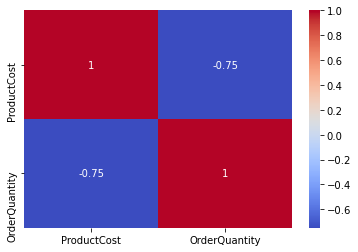

In [32]:
# Assuming correlation_matrix is the result of your correlation calculation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [33]:
numeric_df = df.select_dtypes(include = [np.number])

correlation_matrix = numeric_df.corr()

print(correlation_matrix)


                       ProductKey  CustomerKey  TerritoryKey  OrderLineItem  \
ProductKey                   1.00         0.06         -0.02          -0.26   
CustomerKey                  0.06         1.00         -0.04          -0.02   
TerritoryKey                -0.02        -0.04          1.00          -0.01   
OrderLineItem               -0.26        -0.02         -0.01           1.00   
OrderQuantity                0.29         0.02         -0.02           0.14   
ProductSubcategoryKey        0.12         0.00         -0.07           0.36   
ProductCost                 -0.08        -0.04          0.07          -0.43   
ProductPrice                -0.09        -0.05          0.07          -0.43   
ProductCategoryKey           0.03        -0.01         -0.07           0.44   
AnnualIncome                -0.03        -0.08         -0.06           0.02   
TotalChildren                0.00        -0.03         -0.11           0.01   

                       OrderQuantity  ProductSubcat

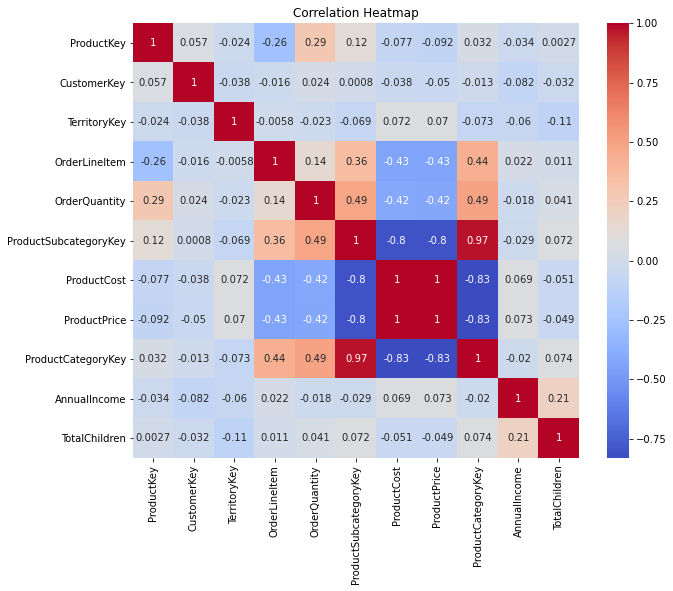

In [34]:
numeric_df = df.select_dtypes(include = [np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

X = df[['ProductCost']]
y = df['ProductPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")



Mean Squared Error: 3351.440374172752
R-squared: 0.995386600052672
Slope: 1.6871910770222438
Intercept: 7.6090019544333245


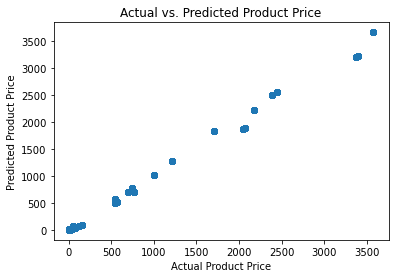

In [37]:
import matplotlib.pyplot as plt

# Plotting Predicted vs. Actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Product Price')
plt.ylabel('Predicted Product Price')
plt.title('Actual vs. Predicted Product Price')
plt.show()


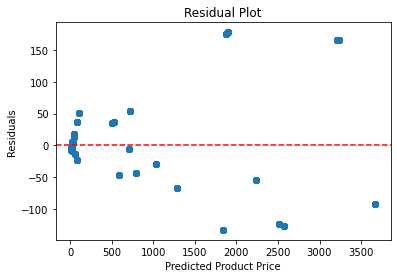

In [38]:
# Calculating residuals
residuals = y_test - predictions

# Plotting Residuals
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Product Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [39]:
# convert dates as strings to DateTime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['StockDate'] = pd.to_datetime(df['StockDate'])


In [40]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                       ProductKey  CustomerKey  TerritoryKey  OrderLineItem  \
ProductKey                   1.00         0.06         -0.02          -0.26   
CustomerKey                  0.06         1.00         -0.04          -0.02   
TerritoryKey                -0.02        -0.04          1.00          -0.01   
OrderLineItem               -0.26        -0.02         -0.01           1.00   
OrderQuantity                0.29         0.02         -0.02           0.14   
ProductSubcategoryKey        0.12         0.00         -0.07           0.36   
ProductCost                 -0.08        -0.04          0.07          -0.43   
ProductPrice                -0.09        -0.05          0.07          -0.43   
ProductCategoryKey           0.03        -0.01         -0.07           0.44   
AnnualIncome                -0.03        -0.08         -0.06           0.02   
TotalChildren                0.00        -0.03         -0.11           0.01   

                       OrderQuantity  ProductSubcat

In [41]:
cross_tab = pd.crosstab(df['ProductSKU'], df['Country'])
print(cross_tab)


Country     Australia  Canada  France  Germany  United Kingdom  United States
ProductSKU                                                                   
BC-M005           261     327     161      178             200            769
BC-R205           496     113     172      171             217            499
BK-M18B-40          8       4       6        6               3             21
BK-M18B-42          4       5       2        8               9             20
BK-M18B-44         11       4       5        4               8             24
...               ...     ...     ...      ...             ...            ...
TT-T092           181     147     255      172             275            334
VE-C304-L          42      25      18        8              14             75
VE-C304-M          35      36      16       15              13             67
VE-C304-S          30      23       6       16              10             72
WB-H098           752     550     330      374             460  

In [42]:
grouped_item = df.groupby('ProductSKU')

grouped_item.describe()

OrderDate                                                      \
               count                           mean                  min   
ProductSKU                                                                 
BC-M005         1896  2017-01-21 04:22:47.088607744  2016-07-01 00:00:00   
BC-R205         1668  2017-01-23 16:14:40.575539456  2016-07-01 00:00:00   
BK-M18B-40        48            2017-01-02 18:30:00  2016-07-03 00:00:00   
BK-M18B-42        48            2017-01-28 22:30:00  2016-07-13 00:00:00   
BK-M18B-44        56  2017-01-25 18:25:42.857142784  2016-07-09 00:00:00   
...              ...                            ...                  ...   
TT-T092         1364  2017-01-24 13:54:01.055718400  2016-07-01 00:00:00   
VE-C304-L        182  2017-01-31 15:01:58.681318656  2016-07-06 00:00:00   
VE-C304-M        182  2017-01-21 15:41:32.307692288  2016-07-07 00:00:00   
VE-C304-S        157  2017-01-20 22:37:27.133757952  2016-07-04 00:00:00   
WB-H098         3983  2017-01-19 23:21:18.935475456  2016-07-01 00:00:00   

                                                                           \
                            25%                  50%                  75%   
ProductSKU                                                                  
BC-M005     2016-11-04 00:00:00  2017-01-28 00:00:00  2017-04-17 00:00:00   
BC-R205     2016-11-05 00:00:00  2017-02-02 00:00:00  2017-04-19 00:00:00   
BK-M18B-40  2016-10-23 06:00:00  2017-01-11 00:00:00  2017-03-17 12:00:00   
BK-M18B-42  2016-11-26 00:00:00  2017-01-19 00:00:00  2017-04-27 00:00:00   
BK-M18B-44  2016-11-22 06:00:00  2017-01-27 12:00:00  2017-04-26 06:00:00   
...                         ...                  ...                  ...   
TT-T092     2016-11-05 18:00:00  2017-01-30 00:00:00  2017-04-22 00:00:00   
VE-C304-L   2016-11-16 12:00:00  2017-02-12 12:00:00  2017-04-17 18:00:00   
VE-C304-M   2016-11-03 06:00:00  2017-01-30 00:00:00  2017-04-08 12:00:00   
VE-C304-S   2016-11-01 00:00:00  2017-01-26 00:00:00  2017-04-27 00:00:00   
WB-H098     2016-10-30 00:00:00  2017-01-27 00:00:00  2017-04-16 00:00:00   

                                     StockDate                                 \
                            max  std     count                           mean   
ProductSKU                                                                      
BC-M005     2017-06-30 00:00:00  NaN      1896  2003-11-16 06:07:35.696202496   
BC-R205     2017-06-30 00:00:00  NaN      1668  2003-11-17 10:12:05.179856128   
BK-M18B-40  2017-06-15 00:00:00  NaN        48            2003-10-27 09:30:00   
BK-M18B-42  2017-06-27 00:00:00  NaN        48            2003-11-19 01:30:00   
BK-M18B-44  2017-06-27 00:00:00  NaN        56  2003-11-16 09:25:42.857142912   
...                         ...  ...       ...                            ...   
TT-T092     2017-06-30 00:00:00  NaN      1364  2003-11-19 00:06:20.058650880   
VE-C304-L   2017-06-28 00:00:00  NaN       182  2003-11-25 20:58:01.318681344   
VE-C304-M   2017-06-30 00:00:00  NaN       182  2003-11-17 06:27:41.538461568   
VE-C304-S   2017-06-30 00:00:00  NaN       157  2003-11-14 00:55:01.910828032   
WB-H098     2017-06-30 00:00:00  NaN      3983  2003-11-13 23:31:48.009038464   

            ... AnnualIncome           TotalChildren                           \
            ...          max       std         count mean  min  25%  50%  75%   
ProductSKU  ...                                                                 
BC-M005     ...   170,000.00 32,966.26      1,896.00 2.06 0.00 0.00 2.00 4.00   
BC-R205     ...   170,000.00 34,973.34      1,668.00 1.66 0.00 0.00 1.50 3.00   
BK-M18B-40  ...   130,000.00 26,288.60         48.00 1.98 0.00 1.00 1.50 4.00   
BK-M18B-42  ...   170,000.00 34,885.20         48.00 2.23 0.00 1.00 2.00 4.00   
BK-M18B-44  ...   170,000.00 29,691.05         56.00 1.93 0.00 1.00 2.00 3.25   
...         ...          ...       ...           ...  ...  ...  ...  ...  ...   
TT-

In [43]:
product_name = df.groupby('ProductName')

product_name.describe()

OrderDate                                 \
                               count                           mean   
ProductName                                                           
AWC Logo Cap                    2062  2017-01-21 12:35:36.954413312   
All-Purpose Bike Stand           234  2017-01-08 12:12:18.461538560   
Bike Wash - Dissolver            850  2017-01-17 20:24:50.823529472   
Classic Vest, L                  182  2017-01-31 15:01:58.681318656   
Classic Vest, M                  182  2017-01-21 15:41:32.307692288   
...                              ...                            ...   
Touring-3000 Yellow, 62           48            2017-02-04 05:30:00   
Water Bottle - 30 oz.           3983  2017-01-19 23:21:18.935475456   
Women's Mountain Shorts, L       334  2017-01-14 21:16:10.059880192   
Women's Mountain Shorts, M       327  2017-01-17 01:32:28.623853312   
Women's Mountain Shorts, S       283  2017-01-19 04:34:46.219081216   

                                                                      \
                                            min                  25%   
ProductName                                                            
AWC Logo Cap                2016-07-02 00:00:00  2016-11-01 00:00:00   
All-Purpose Bike Stand      2016-07-01 00:00:00  2016-10-18 06:00:00   
Bike Wash - Dissolver       2016-07-05 00:00:00  2016-10-26 00:00:00   
Classic Vest, L             2016-07-06 00:00:00  2016-11-16 12:00:00   
Classic Vest, M             2016-07-07 00:00:00  2016-11-03 06:00:00   
...                                         ...                  ...   
Touring-3000 Yellow, 62     2016-07-24 00:00:00  2016-12-14 12:00:00   
Water Bottle - 30 oz.       2016-07-01 00:00:00  2016-10-30 00:00:00   
Women's Mountain Shorts, L  2016-07-15 00:00:00  2016-10-24 12:00:00   
Women's Mountain Shorts, M  2016-07-14 00:00:00  2016-10-27 12:00:00   
Women's Mountain Shorts, S  2016-07-21 00:00:00  2016-10-21 12:00:00   

                                                                      \
                                            50%                  75%   
ProductName                                                            
AWC Logo Cap                2017-01-30 00:00:00  2017-04-17 00:00:00   
All-Purpose Bike Stand      2016-12-30 00:00:00  2017-04-11 18:00:00   
Bike Wash - Dissolver       2017-01-19 00:00:00  2017-04-18 18:00:00   
Classic Vest, L             2017-02-12 12:00:00  2017-04-17 18:00:00   
Classic Vest, M             2017-01-30 00:00:00  2017-04-08 12:00:00   
...                                         ...                  ...   
Touring-3000 Yellow, 62     2017-02-18 00:00:00  2017-04-23 00:00:00   
Water Bottle - 30 oz.       2017-01-27 00:00:00  2017-04-16 00:00:00   
Women's Mountain Shorts, L  2017-01-19 00:00:00  2017-04-06 18:00:00   
Women's Mountain Shorts, M  2017-01-07 00:00:00  2017-04-19 00:00:00   
Women's Mountain Shorts, S  2017-02-01 00:00:00  2017-04-15 00:00:00   

                                                     StockDate  \
                                            max  std     count   
ProductName                                                      
AWC Logo Cap                2017-06-30 00:00:00  NaN      2062   
All-Purpose Bike Stand      2017-06-30 00:00:00  NaN       234   
Bike Wash - Dissolver       2017-06-30 00:00:00  NaN       850   
Classic Vest, L             2017-06-28 00:00:00  NaN       182   
Classic Vest, M             2017-06-30 00:00:00  NaN       182   
...                                         ...  ...       ...   
Touring-3000 Yellow, 62     2017-06-26 00:00:00  NaN        48   
Water Bottle - 30 oz.       2017-06-30 00:00:00  NaN      3983   
Women's Mountain Shorts, L  2017-06-30 00:00:00  NaN       334   
Women's Mountain Shorts, M  2017-06-30 00:00:00  NaN       327   
Women's Mountain Shorts, S  2017-06-30 00:00:00  NaN       283   

                                                           ... AnnualIncome  \
          

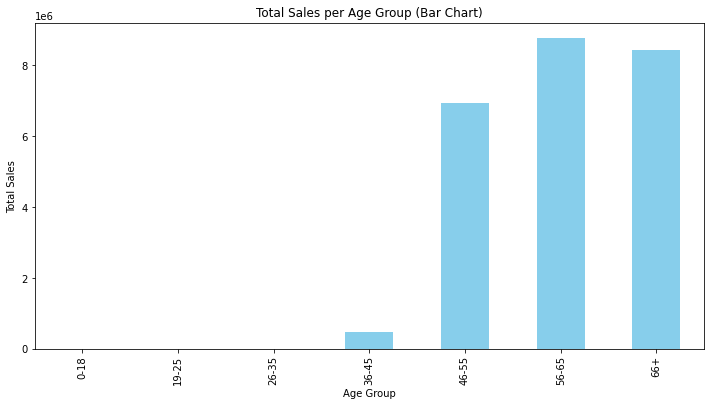

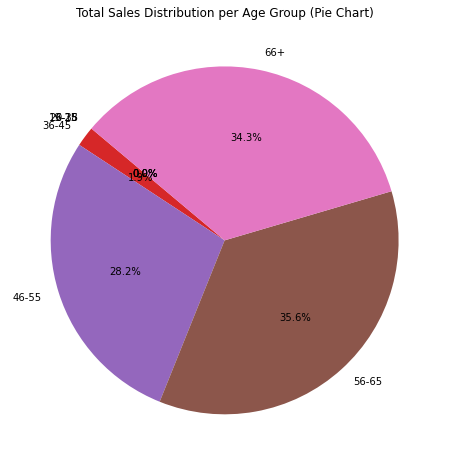

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total sales
sales_per_age = df.groupby('AgeGroup')['ProductPrice'].sum()

# Bar Chart
plt.figure(figsize=(12, 6))
sales_per_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age, labels=sales_per_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Age Group (Pie Chart)')
plt.show()



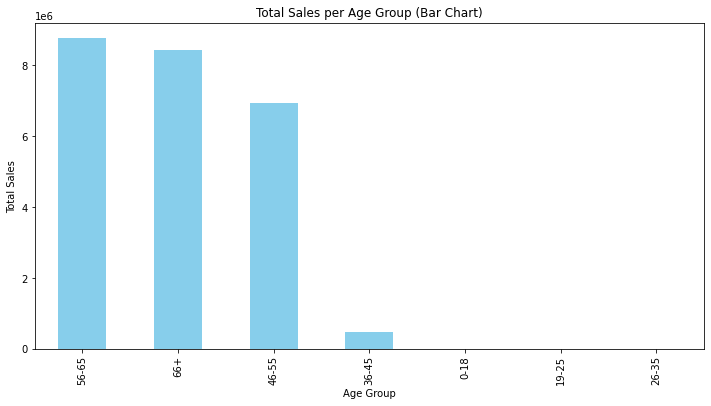

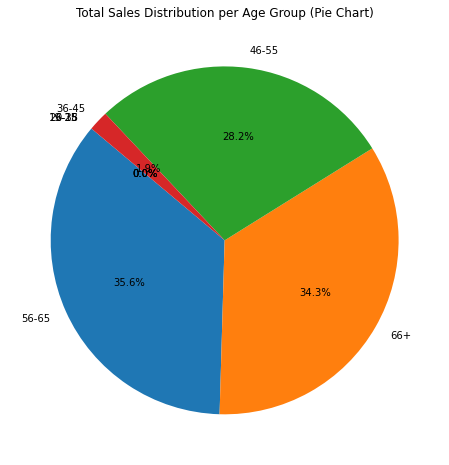

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total sales
sales_per_age = df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age = sales_per_age.sort_values(ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sales_per_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age, labels=sales_per_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Age Group (Pie Chart)')
plt.show()


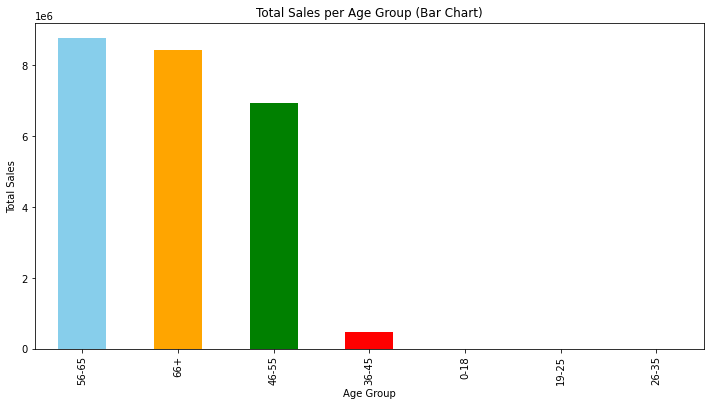

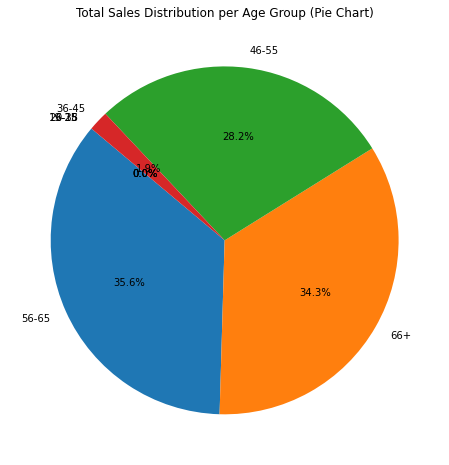

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total sales
sales_per_age = df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age = sales_per_age.sort_values(ascending=False)

# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
sales_per_age.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age, labels=sales_per_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Age Group (Pie Chart)')
plt.show()


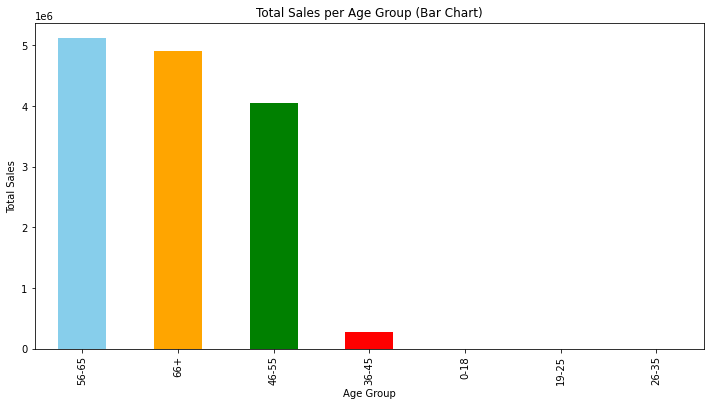

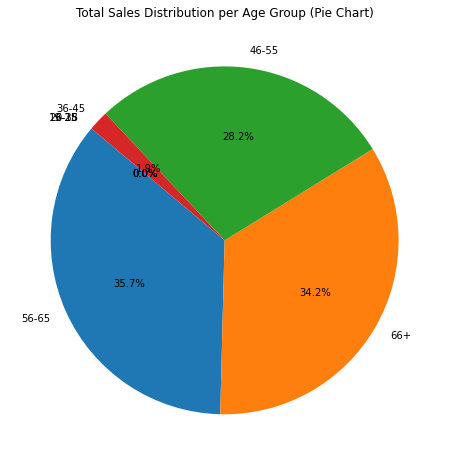

Top Account: 56-65 - Total Sales: 5116950.9951


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total sales
sales_per_age = df.groupby('AgeGroup')['ProductCost'].sum()

# Sort the data in descending order
sales_per_age = sales_per_age.sort_values(ascending=False)

# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
sales_per_age.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age, labels=sales_per_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Age Group (Pie Chart)')
plt.show()

# Print out the top account
top_account = sales_per_age.idxmax()
print(f'Top Account: {top_account} - Total Sales: {sales_per_age.max()}')


Top Person in 56-65: ALEJANDRO CHEN - Total Sales: $8,768,061.79
Top Person in 66+: KYLE WASHINGTON - Total Sales: $8,443,967.24
Top Person in 46-55: COURTNEY TURNER - Total Sales: $6,925,209.59
Top Person in 36-45: MORGAN HOWARD - Total Sales: $458,446.71
No person in 0-18
No person in 19-25
No person in 26-35


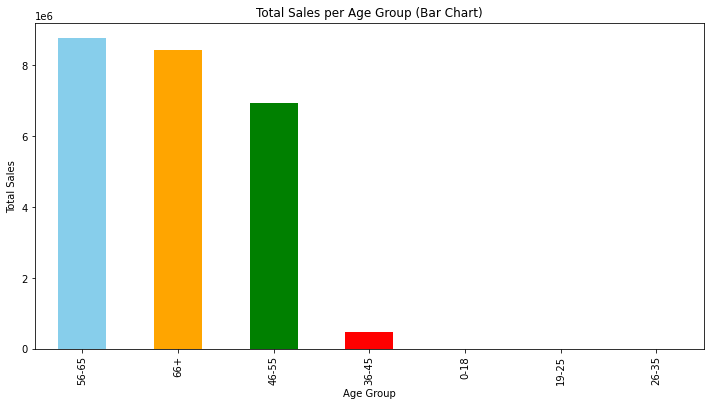

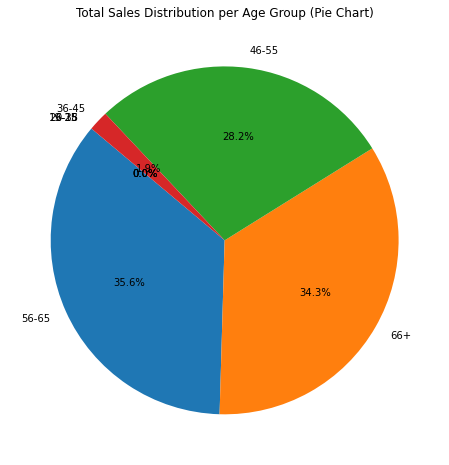

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total sales
sales_per_age = df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age = sales_per_age.sort_values(ascending=False)

# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
ax = sales_per_age.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales per Age Group (Bar Chart)')

# Print out the top person in each age group
for age_group, total_sales in sales_per_age.items():
    top_person = df[df['AgeGroup'] == age_group].nlargest(1, 'ProductPrice')
    if not top_person.empty:
        top_person_info = top_person[['FirstName', 'LastName', 'ProductPrice']].values[0]
        formatted_sales = "${:,.2f}".format(total_sales)
        print(f'Top Person in {age_group}: {top_person_info[0]} {top_person_info[1]} - Total Sales: {formatted_sales}')
    else:
        print(f'No person in {age_group}')

plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age, labels=sales_per_age.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution per Age Group (Pie Chart)')
plt.show()



In [49]:
income = df['AnnualIncome']
income.head()

0    80,000.00
1    80,000.00
2   100,000.00
3    30,000.00
4    20,000.00
Name: AnnualIncome, dtype: float64

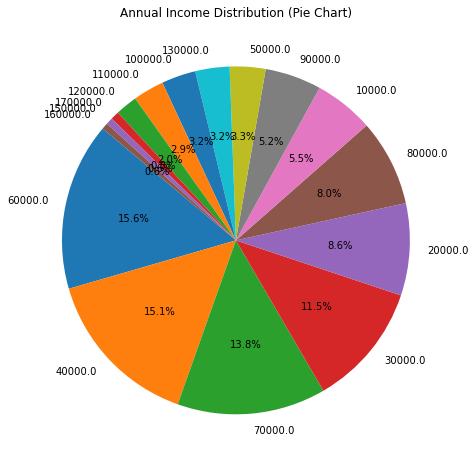

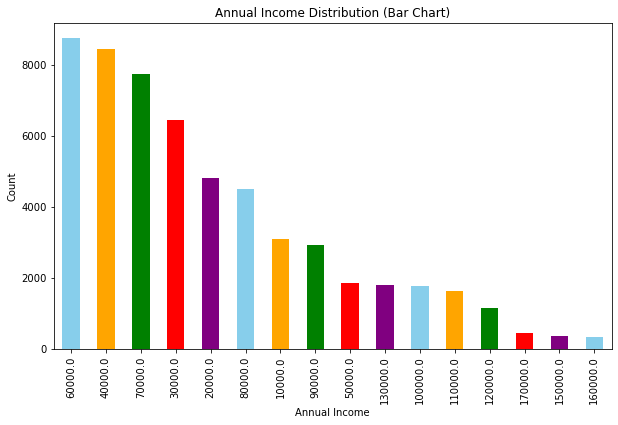

In [50]:
import matplotlib.pyplot as plt

income = df['AnnualIncome']

# Count the occurrences of each unique value in 'AnnualIncome'
income_counts = income.value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Annual Income Distribution (Pie Chart)')
plt.show()

# Bar Chart with custom color
plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Distribution (Bar Chart)')
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter for accessories
road_bikes_df = df[df['SubcategoryName'] == 'Road Bikes']
print(road_bikes_df)
road_bikes_df.head()


       OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  \
0     2015-01-01 2001-09-21     SO45080         332        14657   
1     2015-01-01 2001-12-05     SO45079         312        29255   
3     2015-01-01 2001-11-16     SO45081         338        26782   
4     2015-01-02 2001-12-15     SO45083         312        14947   
5     2015-01-02 2001-10-12     SO45084         310        29143   
...          ...        ...         ...         ...          ...   
55993 2017-06-30 2004-06-12     SO74104         375        20807   
56007 2017-06-30 2004-06-14     SO74146         584        26916   
56029 2017-06-30 2004-03-12     SO74137         375        22202   
56031 2017-06-30 2004-05-30     SO74142         383        22253   
56043 2017-06-30 2004-04-08     SO74143         606        28517   

       TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
0                 1              1              1                      2   
1                 4            

OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0 2015-01-01 2001-09-21     SO45080         332        14657             1   
1 2015-01-01 2001-12-05     SO45079         312        29255             4   
3 2015-01-01 2001-11-16     SO45081         338        26782             6   
4 2015-01-02 2001-12-15     SO45083         312        14947            10   
5 2015-01-02 2001-10-12     SO45084         310        29143             4   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  ...  \
0              1              1                      2  BK-R50B-58  ...   
1              1              1                      2  BK-R93R-48  ...   
3              1              1                      2  BK-R50B-44  ...   
4              1              1                      2  BK-R93R-48  ...   
5              1              1                      2  BK-R93R-62  ...   

  MaritalStatus Gender                    EmailAddress AnnualIncome  \
0             M      M      john48@adventure-works.com    80,000.00   
1             S      M       kyle8@adventure-works.com    80,000.00   
3             S      M      seth20@adventure-works.com    30,000.00   
4             S      M  alejandro4@adventure-works.com    20,000.00   
5             S      F     grace54@adventure-works.com    60,000.00   

  TotalChildren   EducationLevel      Occupation  HomeOwner   Age  AgeGroup  
0          1.00  Partial College  Skilled Manual          N 65.46       66+  
1          3.00  Partial College    Professional          N 69.04       66+  
3          0.00      High School  Skilled Manual          N 43.58     36-45  
4          2.00      High School          Manual          Y 59.29     56-65  
5          1.00        Bachelors    Professional          N 62.11     56-65  

[5 rows x 37 columns]

In [52]:
# Group by age group and calculate total sales for accessories
sales_per_age_bikes = road_bikes_df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age_bikes = sales_per_age_bikes.sort_values(ascending=False)

# Format the values in dollars
sales_per_age_bikes_formatted = sales_per_age_bikes.map('${:,.2f}'.format)

# Print the formatted values
print(sales_per_age_bikes_formatted)

AgeGroup
56-65    $3,969,811.75
66+      $3,737,579.94
46-55    $3,292,088.93
36-45      $286,303.87
0-18             $0.00
19-25            $0.00
26-35            $0.00
Name: ProductPrice, dtype: object


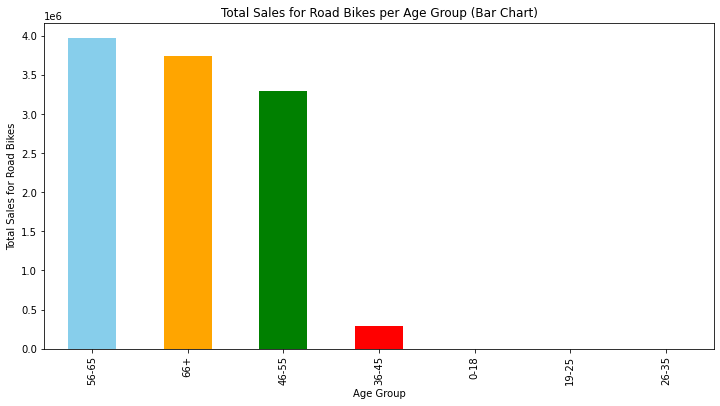

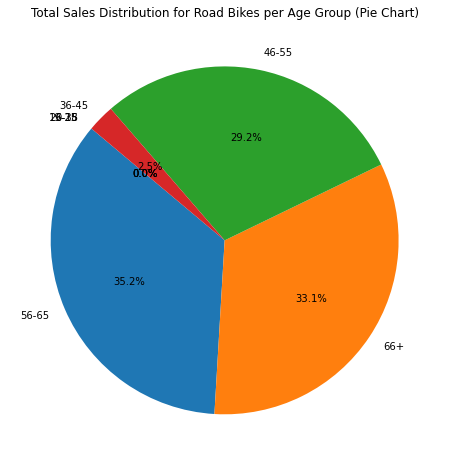

In [53]:
# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
ax = sales_per_age_bikes.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales for Road Bikes')
plt.title('Total Sales for Road Bikes per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age_bikes, labels=sales_per_age_bikes.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution for Road Bikes per Age Group (Pie Chart)')
plt.show()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

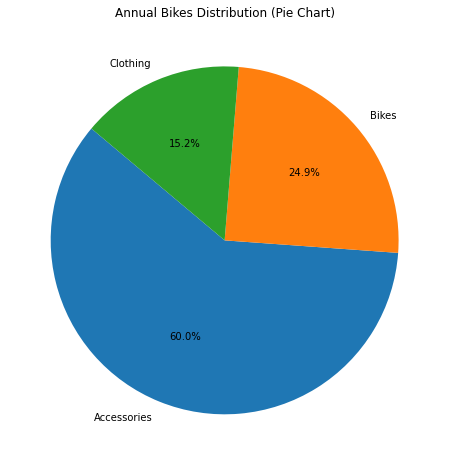

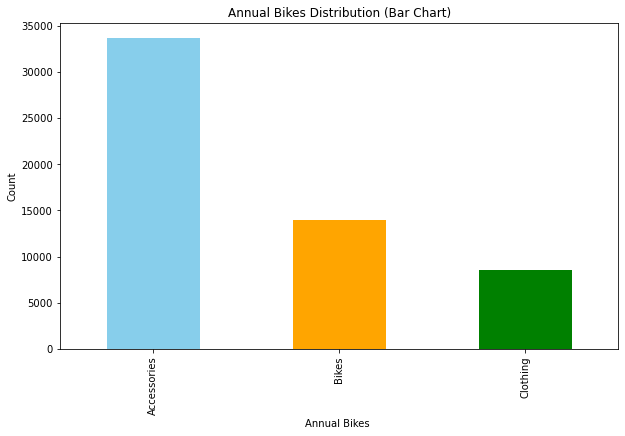

In [55]:
import matplotlib.pyplot as plt

bikes = df['CategoryName']

# Count the occurrences of each unique value in 'AnnualIncome'
bikes_counts = bikes.value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(bikes_counts, labels=bikes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Annual Bikes Distribution (Pie Chart)')
plt.show()

# Bar Chart with custom color
plt.figure(figsize=(10, 6))
bikes_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Annual Bikes ')
plt.ylabel('Count')
plt.title('Annual Bikes Distribution (Bar Chart)')
plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter for accessories
mountain_bikes_df = df[df['SubcategoryName'] == 'Mountain Bikes']
print(mountain_bikes_df)
mountain_bikes_df.head()

       OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  \
2     2015-01-01 2001-10-29     SO45082         350        11455   
10    2015-01-03 2001-12-11     SO45088         345        11398   
12    2015-01-03 2001-12-16     SO45089         351        25977   
14    2015-01-03 2001-09-11     SO45087         350        11388   
19    2015-01-04 2001-12-07     SO45095         344        11394   
...          ...        ...         ...         ...          ...   
55981 2017-06-30 2004-05-20     SO74129         354        18400   
55995 2017-06-30 2004-03-11     SO74109         360        19918   
56018 2017-06-30 2004-06-10     SO74132         356        11512   
56022 2017-06-30 2004-03-25     SO74108         354        14984   
56034 2017-06-30 2004-03-16     SO74130         358        21266   

       TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
2                 9              1              1                      1   
10               10            

OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
2  2015-01-01 2001-10-29     SO45082         350        11455             9   
10 2015-01-03 2001-12-11     SO45088         345        11398            10   
12 2015-01-03 2001-12-16     SO45089         351        25977             4   
14 2015-01-03 2001-09-11     SO45087         350        11388            10   
19 2015-01-04 2001-12-07     SO45095         344        11394            10   

    OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  \
2               1              1                      1  BK-M82B-44   
10              1              1                      1  BK-M82S-42   
12              1              1                      1  BK-M82B-48   
14              1              1                      1  BK-M82B-44   
19              1              1                      1  BK-M82S-38   

                ProductName     ModelName  \
2    Mountain-100 Black, 44  Mountain-100   
10  Mountain-100 Silver, 42  Mountain-100   
12   Mountain-100 Black, 48  Mountain-100   
14   Mountain-100 Black, 44  Mountain-100   
19  Mountain-100 Silver, 38  Mountain-100   

                                   ProductDescription ProductColor  \
2   Top-of-the-line competition mountain bike. Per...        Black   
10  Top-of-the-line competition mountain bike. Per...       Silver   
12  Top-of-the-line competition mountain bike. Per...        Black   
14  Top-of-the-line competition mountain bike. Per...        Black   
19  Top-of-the-line competition mountain bike. Per...       Silver   

   ProductSize ProductStyle  ProductCost  ProductPrice SubcategoryName  \
2           44            U     1,898.09      3,374.99  Mountain Bikes   
10          42            U     1,912.15      3,399.99  Mountain Bikes   
12          48            U     1,898.09      3,374.99  Mountain Bikes   
14          44            U     1,898.09      3,374.99  Mountain Bikes   
19          38            U     1,912.15      3,399.99  Mountain Bikes   

    ProductCategoryKey          Region         Country      Continent  \
2                    1       Australia       Australia        Pacific   
10                   1  United Kingdom  United Kingdom         Europe   
12                   1       Southwest   United States  North America   
14                   1  United Kingdom  United Kingdom         Europe   
19                   1  United Kingdom  United Kingdom         Europe   

   CategoryName FirstName  LastName  BirthDate MaritalStatus Gender  \
2         Bikes      ROSS      SANZ 1974-04-21             M      M   
10        Bikes     COLIN      NATH 1969-09-09             S      M   
12        Bikes     JENNA     LOPEZ 1968-04-23             M      F   
14        Bikes    JOSEPH    MARTIN 1959-07-24             M      M   
19        Bikes    GEORGE  MCDONALD 1969-10-23             S      M   

                    EmailAddress  AnnualIncome  TotalChildren  \
2     ross38@adventure-works.com    100,000.00           0.00   
10   colin41@adventure-works.com     30,000.00           0.00   
12   jenna20@adventure-works.com     60,000.00           2.00   
14  joseph21@adventure-works.com     40,000.00           3.00   
19  george13@adventure-works.com     10,000.00           2.00   

     EducationLevel    Occupation HomeOwner   Age AgeGroup  
2       High School    Management         Y 50.02    46-55  
10        Bachelors      Clerical         Y 54.63    46-55  
12  Graduate Degree  Professional         Y 56.01    56-65  
14  Graduate Degree      Clerical         Y 64.76    56-65  
19      High School        Manual         Y 54.51    46-55

In [57]:
# Group by age group and calculate total sales for accessories
sales_per_age_bikes = mountain_bikes_df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age_bikes = sales_per_age_bikes.sort_values(ascending=False)

# Format the values in dollars
sales_per_age_bikes_formatted = sales_per_age_bikes.map('${:,.2f}'.format)

# Print the formatted values
print(sales_per_age_bikes_formatted)

AgeGroup
56-65    $3,069,150.61
66+      $3,062,923.42
46-55    $2,330,807.31
36-45      $118,794.99
0-18             $0.00
19-25            $0.00
26-35            $0.00
Name: ProductPrice, dtype: object


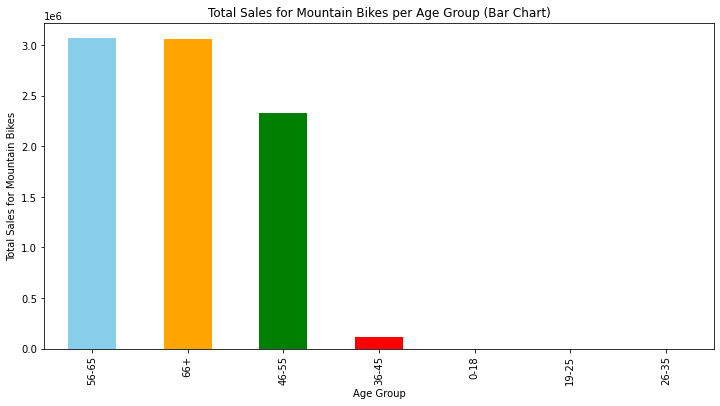

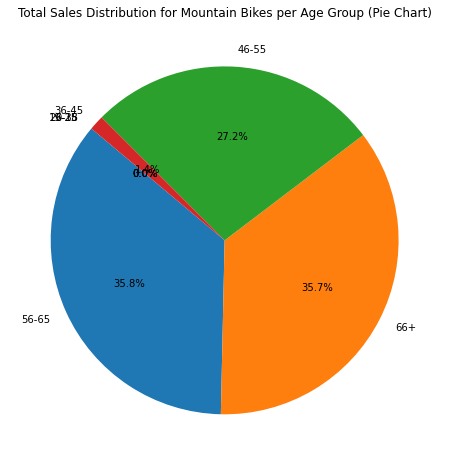

In [58]:
# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
ax = sales_per_age_bikes.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales for Mountain Bikes')
plt.title('Total Sales for Mountain Bikes per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age_bikes, labels=sales_per_age_bikes.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution for Mountain Bikes per Age Group (Pie Chart)')
plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df['BirthDate'] = pd.to_datetime(df['BirthDate'])
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days / 365.25  # Use 365.25 to account for leap years

# Create age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter for accessories
touring_bikes_df = df[df['SubcategoryName'] == 'Touring Bikes']
print(touring_bikes_df)
touring_bikes_df.head()

       OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  \
4345  2016-07-01 2003-04-30     SO51185         571        27767   
4347  2016-07-01 2003-04-01     SO51177         577        27873   
4355  2016-07-01 2003-05-13     SO51186         573        24339   
4380  2016-07-02 2003-04-10     SO51202         578        26864   
4393  2016-07-02 2003-05-06     SO51201         573        27820   
...          ...        ...         ...         ...          ...   
55962 2017-06-30 2004-05-09     SO74135         585        28368   
55973 2017-06-30 2004-03-18     SO74133         560        13765   
55987 2017-06-30 2004-03-14     SO74145         561        13650   
55989 2017-06-30 2004-04-25     SO74144         574        12314   
56002 2017-06-30 2004-05-04     SO74134         579        20051   

       TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
4345              8              1              1                      3   
4347              9            

OrderDate  StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
4345 2016-07-01 2003-04-30     SO51185         571        27767             8   
4347 2016-07-01 2003-04-01     SO51177         577        27873             9   
4355 2016-07-01 2003-05-13     SO51186         573        24339             4   
4380 2016-07-02 2003-04-10     SO51202         578        26864             8   
4393 2016-07-02 2003-05-06     SO51201         573        27820            10   

      OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  \
4345              1              1                      3  BK-T18Y-58   
4347              1              1                      3  BK-T44U-46   
4355              1              1                      3  BK-T79U-46   
4380              1              1                      3  BK-T44U-50   
4393              1              1                      3  BK-T79U-46   

                  ProductName     ModelName  \
4345  Touring-3000 Yellow, 58  Touring-3000   
4347    Touring-2000 Blue, 46  Touring-2000   
4355    Touring-1000 Blue, 46  Touring-1000   
4380    Touring-2000 Blue, 50  Touring-2000   
4393    Touring-1000 Blue, 46  Touring-1000   

                                     ProductDescription ProductColor  \
4345  All-occasion value bike with our basic comfort...       Yellow   
4347  The plush custom saddle keeps you riding all d...         Blue   
4355  Travel in style and comfort. Designed for maxi...         Blue   
4380  The plush custom saddle keeps you riding all d...         Blue   
4393  Travel in style and comfort. Designed for maxi...         Blue   

     ProductSize ProductStyle  ProductCost  ProductPrice SubcategoryName  \
4345          58            U       461.44        742.35   Touring Bikes   
4347          46            U       755.15      1,214.85   Touring Bikes   
4355          46            U     1,481.94      2,384.07   Touring Bikes   
4380          50            U       755.15      1,214.85   Touring Bikes   
4393          46            U     1,481.94      2,384.07   Touring Bikes   

      ProductCategoryKey          Region         Country      Continent  \
4345                   1         Germany         Germany         Europe   
4347                   1       Australia       Australia        Pacific   
4355                   1       Southwest   United States  North America   
4380                   1         Germany         Germany         Europe   
4393                   1  United Kingdom  United Kingdom         Europe   

     CategoryName  FirstName LastName  BirthDate MaritalStatus Gender  \
4345        Bikes     BRANDY     ARUN 1967-10-10             S      F   
4347        Bikes       DAWN       XU 1978-04-03             M      F   
4355        Bikes   JENNIFER    PRICE 1961-10-10             S      F   
4380        Bikes  CHRISTINE   SUTTON 1979-06-02             S      F   
4393        Bikes       JOEL    PATEL 1963-07-10             M      M   

                        EmailAddress  AnnualIncome  TotalChildren  \
4345     brandy2@adventure-works.com     20,000.00           1.00   
4347      dawn14@adventure-works.com     20,000.00           0.00   
4355  jennifer75@adventure-works.com     40,000.00           4.00   
4380  christine2@adventure-works.com     30,000.00           3.00   
4393       joel2@adventure-works.com     40,000.00           1.00   

       EducationLevel      Occupation HomeOwner   Age AgeGroup  
4345  Partial College          Manual         Y 56.54    56-65  
4347        Bachelors        Clerical         Y 46.06    46-55  
4355      High School  Skilled Manual         Y 62.54    56-65  
4380  Partial College        Clerical         Y 44.90    36-45  
4393        Bachelors  Skilled Manual         Y 60.80    56-65

In [60]:
# Group by age group and calculate total sales for accessories
sales_per_age_bikes = touring_bikes_df.groupby('AgeGroup')['ProductPrice'].sum()

# Sort the data in descending order
sales_per_age_bikes = sales_per_age_bikes.sort_values(ascending=False)

# Format the values in dollars
sales_per_age_bikes_formatted = sales_per_age_bikes.map('${:,.2f}'.format)

# Print the formatted values
print(sales_per_age_bikes_formatted)


AgeGroup
56-65    $1,403,731.65
66+      $1,290,574.50
46-55    $1,044,372.72
36-45       $31,670.94
0-18             $0.00
19-25            $0.00
26-35            $0.00
Name: ProductPrice, dtype: object


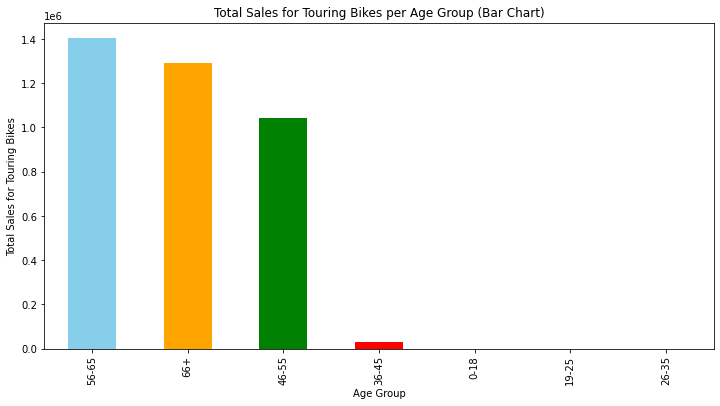

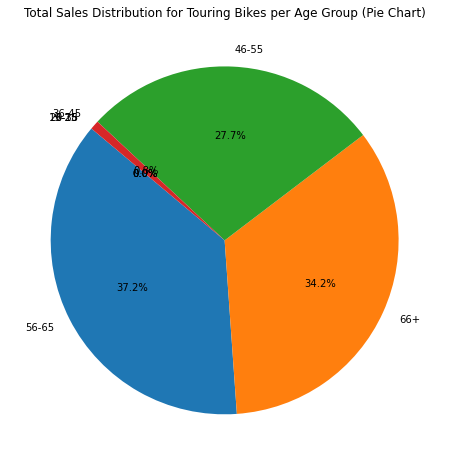

In [61]:
# Define custom colors for each age group
custom_colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']

# Bar Chart with custom colors
plt.figure(figsize=(12, 6))
ax = sales_per_age_bikes.plot(kind='bar', color=custom_colors)
plt.xlabel('Age Group')
plt.ylabel('Total Sales for Touring Bikes')
plt.title('Total Sales for Touring Bikes per Age Group (Bar Chart)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_age_bikes, labels=sales_per_age_bikes.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution for Touring Bikes per Age Group (Pie Chart)')
plt.show()

In [62]:
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Calculate the total revenue
total_revenue = df['ProductPrice'].sum()

# Calculate revenue for each part
part_revenue = df.groupby('ProductSKU')['ProductPrice'].sum()

# Calculate percentage of revenue for each part
part_percentage = {}
for item, revenue in part_revenue.items():
    percentage = (revenue / total_revenue) * 100
    part_percentage[item] = percentage

# Create a DataFrame with percentages and sort it by percentage in descending order
top_items = pd.DataFrame(list(part_percentage.items()), columns=['Item', 'Percentage'])
top_items = top_items.sort_values(by='Percentage', ascending=False)

print(top_items)


           Item  Percentage
18   BK-M68B-46        5.05
17   BK-M68B-42        5.01
19   BK-M68S-38        4.93
21   BK-M68S-46        4.81
16   BK-M68B-38        4.74
20   BK-M68S-42        4.61
57   BK-R89B-52        2.80
62   BK-R89R-58        2.69
56   BK-R89B-48        2.61
64   BK-R93R-48        2.60
67   BK-R93R-62        2.46
65   BK-R93R-52        2.44
58   BK-R89B-58        2.38
55   BK-R89B-44        2.33
66   BK-R93R-56        2.28
63   BK-R93R-44        2.02
82   BK-T79U-46        1.71
51   BK-R79Y-40        1.66
86   BK-T79Y-46        1.63
52   BK-R79Y-42        1.61
60   BK-R89R-48        1.60
54   BK-R79Y-48        1.56
84   BK-T79U-54        1.52
88   BK-T79Y-54        1.48
53   BK-R79Y-44        1.47
83   BK-T79U-50        1.43
85   BK-T79U-60        1.42
87   BK-T79Y-50        1.41
59   BK-R89R-44        1.40
89   BK-T79Y-60        1.34
61   BK-R89R-52        1.27
48   BK-R64Y-42        1.20
49   BK-R64Y-44        1.14
46   BK-R64Y-38        1.07
47   BK-R64Y-40     

In [63]:
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Calculate the total revenue
total_revenue = df['ProductPrice'].sum()

# Calculate revenue for each part
part_revenue = df.groupby('ProductSKU')['ProductPrice'].sum()

# Calculate percentage of revenue for each part
part_percentage = {}
for item, revenue in part_revenue.items():
    percentage = (revenue / total_revenue) * 100
    part_percentage[item] = {'Revenue': revenue, 'Percentage': percentage}

# Create a DataFrame with revenue and percentages and sort it by percentage in descending order
top_items = pd.DataFrame(part_percentage).T
top_items = top_items.sort_values(by='Percentage', ascending=False)

print(top_items)


                Revenue  Percentage
BK-M68B-46 1,241,753.51        5.05
BK-M68B-42 1,233,557.12        5.01
BK-M68S-38 1,213,851.89        4.93
BK-M68S-46 1,182,780.59        4.81
BK-M68B-38 1,165,936.88        4.74
BK-M68S-42 1,133,066.52        4.61
BK-R89B-52   689,373.75        2.80
BK-R89R-58   661,013.44        2.69
BK-R89B-48   641,379.38        2.61
BK-R93R-48   640,510.33        2.60
BK-R93R-62   604,727.63        2.46
BK-R93R-52   601,149.36        2.44
BK-R89B-58   584,658.75        2.38
BK-R89B-44   573,750.94        2.33
BK-R93R-56   561,788.39        2.28
BK-R93R-44   497,379.53        2.02
BK-T79U-46   419,596.32        1.71
BK-R79Y-40   408,237.60        1.66
BK-T79Y-46   400,523.76        1.63
BK-R79Y-42   396,330.67        1.61
BK-R89R-48   393,379.35        1.60
BK-R79Y-48   382,722.75        1.56
BK-T79U-54   374,298.99        1.52
BK-T79Y-54   364,762.71        1.48
BK-R79Y-44   362,310.87        1.47
BK-T79U-50   352,842.36        1.43
BK-T79U-60   350,458.29     

In [64]:
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Calculate the total revenue
total_revenue = df['ProductPrice'].sum()

# Calculate revenue for each part
part_revenue = df.groupby('ProductSKU')['ProductPrice'].sum()

# Calculate percentage of revenue for each part
part_percentage = {}
for item, revenue in part_revenue.items():
    percentage = (revenue / total_revenue) * 100
    # Format revenue to display two decimals
    revenue_formatted = '{:.2f}'.format(revenue)
    part_percentage[item] = {'Revenue': revenue_formatted, 'Percentage': percentage}

# Create a DataFrame with revenue and percentages and sort it by percentage in descending order
top_items = pd.DataFrame(part_percentage).T
top_items = top_items.sort_values(by='Percentage', ascending=False)

print(top_items)


               Revenue Percentage
BK-M68B-46  1241753.51       5.05
BK-M68B-42  1233557.12       5.01
BK-M68S-38  1213851.89       4.93
BK-M68S-46  1182780.59       4.81
BK-M68B-38  1165936.88       4.74
BK-M68S-42  1133066.52       4.61
BK-R89B-52   689373.75       2.80
BK-R89R-58   661013.44       2.69
BK-R89B-48   641379.38       2.61
BK-R93R-48   640510.33       2.60
BK-R93R-62   604727.63       2.46
BK-R93R-52   601149.36       2.44
BK-R89B-58   584658.75       2.38
BK-R89B-44   573750.94       2.33
BK-R93R-56   561788.39       2.28
BK-R93R-44   497379.53       2.02
BK-T79U-46   419596.32       1.71
BK-R79Y-40   408237.60       1.66
BK-T79Y-46   400523.76       1.63
BK-R79Y-42   396330.67       1.61
BK-R89R-48   393379.35       1.60
BK-R79Y-48   382722.75       1.56
BK-T79U-54   374298.99       1.52
BK-T79Y-54   364762.71       1.48
BK-R79Y-44   362310.87       1.47
BK-T79U-50   352842.36       1.43
BK-T79U-60   350458.29       1.42
BK-T79Y-50   348074.22       1.41
BK-R89R-44   3

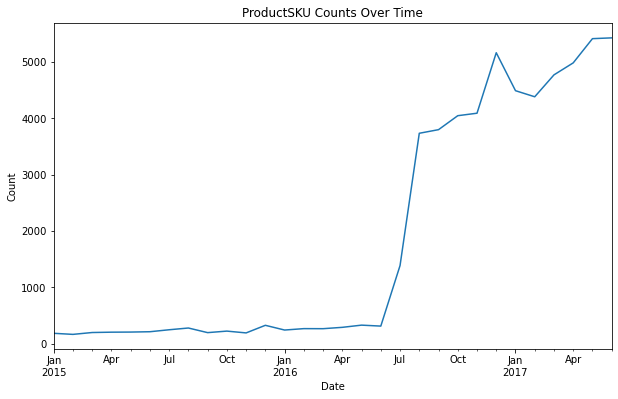

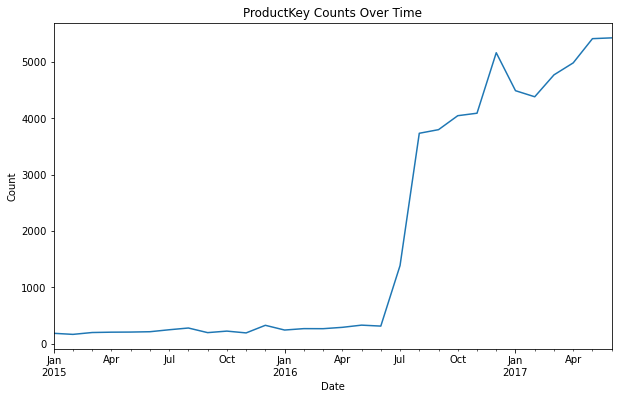

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')

# OrderDate formatting
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

# Aggregate data by 'ProductSKU' or 'ProductKey' and time intervals (e.g., monthly)
product_sku_counts = df['ProductSKU'].resample('M').count()
product_key_counts = df['ProductKey'].resample('M').count()

# EDA
plt.figure(figsize=(10,6))
product_sku_counts.plot()
plt.title('ProductSKU Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Line chart
plt.figure(figsize=(10,6))
product_key_counts.plot()
plt.title('ProductKey Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


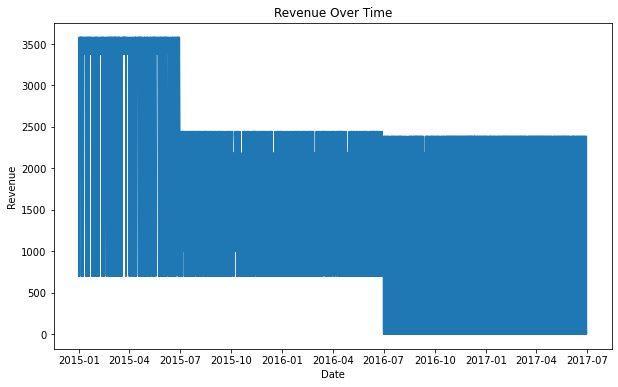

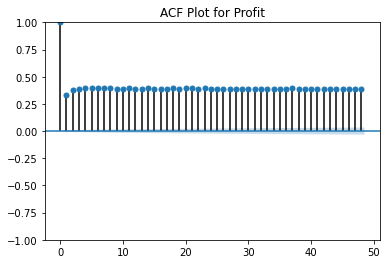

C:\Users\mark.hanson\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


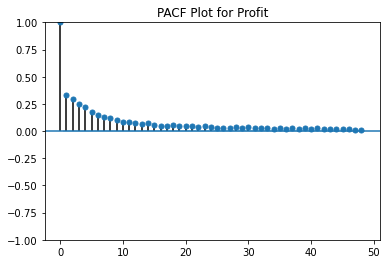

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')

# Step 1: Rename Column
df.rename(columns={'ProductPrice': 'Revenue'}, inplace=True)

# Step 2: Revenue Projection
# OrderDate formatting
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

# EDA for Revenue
plt.figure(figsize=(10,6))
plt.plot(df['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Step 3: Calculate Profit
df['Profit'] = df['Revenue'] - df['ProductCost']

# Step 4: Time Series Analysis on Profit
# Assuming 'OrderDate' is the time series variable
profit_series = df['Profit']

# ACF and PACF plots for profit
plot_acf(profit_series)
plt.title('ACF Plot for Profit')
plt.show()

# chart
plot_pacf(profit_series)
plt.title('PACF Plot for Profit')
plt.show()

# Model fitting for profit
# Assuming p, d, q values are determined
# model_profit = ARIMA(profit_series, order=(p, d, q))
# fitted_model_profit = model_profit.fit()

# Forecasting for profit
# forecast_profit = fitted_model_profit.forecast(steps=...)


# Further analysis and visualization of profit forecast


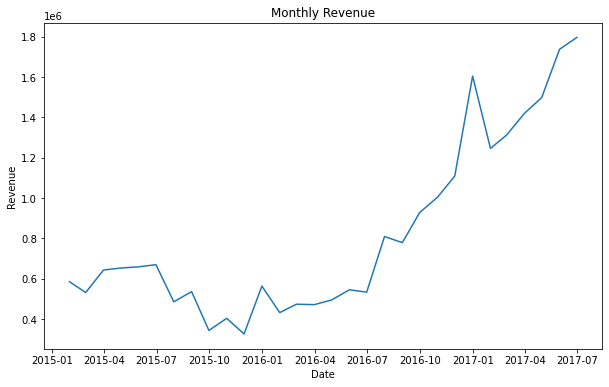

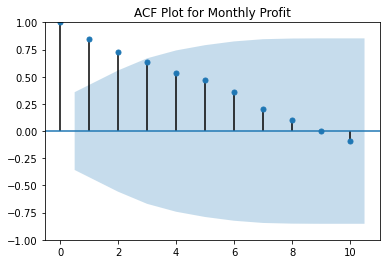

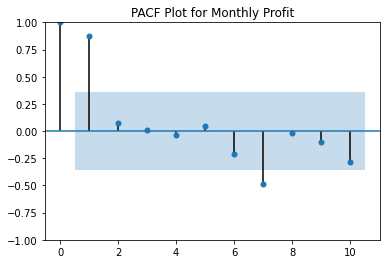

In [67]:
df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Rename Column
df.rename(columns={'ProductPrice': 'Revenue'}, inplace=True)

# Step 2: Revenue Projection
# Assuming 'OrderDate' is the time series variable
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

# Resample by months and aggregate the revenue
monthly_revenue = df['Revenue'].resample('M').sum()

# EDA for Monthly Revenue
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Step 3: Calculate Profit
df['Profit'] = df['Revenue'] - df['ProductCost']

# Resample by months and aggregate the profit
monthly_profit = df['Profit'].resample('M').sum()

# Step 4: Time Series Analysis on Monthly Profit
# ACF and PACF plots for monthly profit
# Limiting the number of lags to avoid ValueError
# Line chart
plot_acf(monthly_profit, lags=min(len(monthly_profit) - 1, 10))
plt.title('ACF Plot for Monthly Profit')
plt.show()

# Using 'yw' method for PACF computation
plot_pacf(monthly_profit, lags=min(len(monthly_profit) - 1, 10), method='yw')
plt.title('PACF Plot for Monthly Profit')
plt.show()

# Model fitting for monthly profit
# Assuming p, d, q values are determined
# model_monthly_profit = ARIMA(monthly_profit, order=(p, d, q))
# fitted_model_monthly_profit = model_monthly_profit.fit()

# Forecasting for monthly profit
# forecast_monthly_profit = fitted_model_monthly_profit.forecast(steps=...)


# Further analysis and visualization of monthly profit forecast


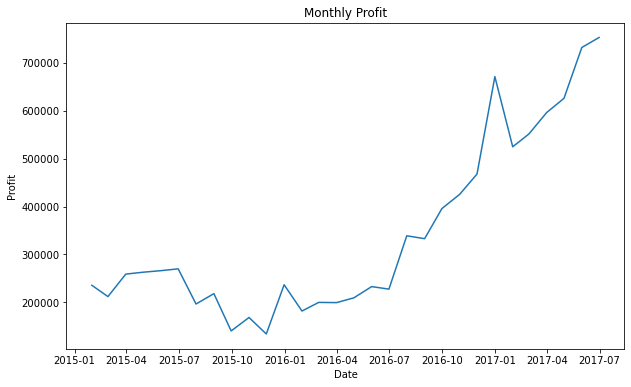

In [68]:
# build a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit)
plt.title('Monthly Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()


In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_profit)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 1.3695248330018623
p-value: 0.9969712035180937
Critical Values: {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}


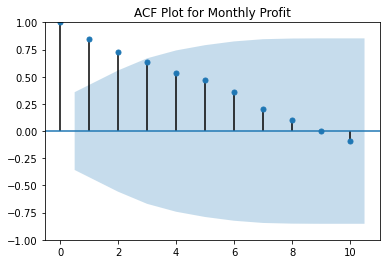

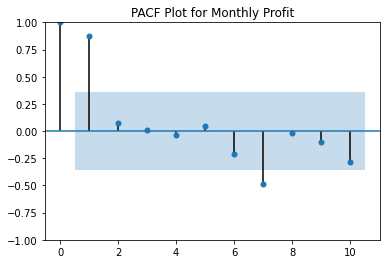

In [70]:
plot_acf(monthly_profit, lags=min(len(monthly_profit) - 1, 10))
plt.title('ACF Plot for Monthly Profit')
plt.show()

plot_pacf(monthly_profit, lags=min(len(monthly_profit) - 1, 10), method='yw')
plt.title('PACF Plot for Monthly Profit')
plt.show()


In [197]:
from statsmodels.tsa.arima.model import ARIMA

def StartARIMAForecasting(Actual, P, D, Q):
  model = ARIMA(Actual, order=(P, D, Q))
  model_fit = model.fit(disp=0)
  prediction = model_fit.forecast()[0]
  return prediction


In [198]:


# Example: Fit ARIMA(1, 1, 1) model
model = ARIMA(monthly_profit, order=(1, 1, 1))
fitted_model = model.fit()
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -362.079
Date:                Tue, 30 Apr 2024   AIC                            730.157
Time:                        10:41:18   BIC                            734.259
Sample:                    01-31-2015   HQIC                           731.442
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4991      0.928     -0.538      0.591      -2.318       1.319
ma.L1          0.2915      0.958      0.304      0.761      -1.587       2.170
sigma2      4.681e+09   3.21e-10   1.46e+19      0.0

In [199]:
fitted_model.plot_diagnostics(figsize=(15, 8))
plt.show()


In [200]:
print('AIC:', fitted_model.aic)
print('BIC:', fitted_model.bic)


AIC: 730.1572952815361
BIC: 734.2591827714955


In [201]:
forecast_steps = 12  # Example: Forecasting for the next 12 months
forecast = fitted_model.forecast(steps=forecast_steps)
print('Forecast:', forecast)


Forecast: 2017-07-31   754,468.41
2017-08-31   753,639.27
2017-09-30   754,053.11
2017-10-31   753,846.56
2017-11-30   753,949.65
2017-12-31   753,898.20
2018-01-31   753,923.88
2018-02-28   753,911.06
2018-03-31   753,917.46
2018-04-30   753,914.26
2018-05-31   753,915.86
2018-06-30   753,915.06
Freq: M, Name: predicted_mean, dtype: float64


In [202]:
# Plot diagnostics for the fitted model
fitted_model.plot_diagnostics(figsize=(15, 8))
plt.show()


In [203]:
# Perform diagnostic tests
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -362.079
Date:                Tue, 30 Apr 2024   AIC                            730.157
Time:                        10:41:56   BIC                            734.259
Sample:                    01-31-2015   HQIC                           731.442
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4991      0.928     -0.538      0.591      -2.318       1.319
ma.L1          0.2915      0.958      0.304      0.761      -1.587       2.170
sigma2      4.681e+09   3.21e-10   1.46e+19      0.0

In [204]:
# Try different combinations of (p, d, q) parameters
# Example: ARIMA(2, 1, 2) model
model = ARIMA(monthly_profit, order=(2, 1, 2))
fitted_model = model.fit()
print(fitted_model.summary())

# Compare models using AIC or BIC
print('AIC:', fitted_model.aic)
print('BIC:', fitted_model.bic)


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -361.114
Date:                Tue, 30 Apr 2024   AIC                            732.228
Time:                        10:42:05   BIC                            739.065
Sample:                    01-31-2015   HQIC                           734.369
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4694      0.858      0.547      0.584      -1.212       2.151
ar.L2          0.3423      0.808      0.424      0.672      -1.242       1.927
ma.L1         -0.6899      0.924     -0.747      0.4

C:\Users\mark.hanson\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mark.hanson\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   30
Model:                 ARIMA(4, 4, 4)   Log Likelihood                -331.507
Date:                Tue, 30 Apr 2024   AIC                            681.013
Time:                        10:42:09   BIC                            692.336
Sample:                    01-31-2015   HQIC                           684.274
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6588      0.240     -6.913      0.000      -2.129      -1.188
ar.L2         -1.8640      0.529     -3.526      0.000      -2.900      -0.828
ar.L3         -1.1322      0.473     -2.392      0.0

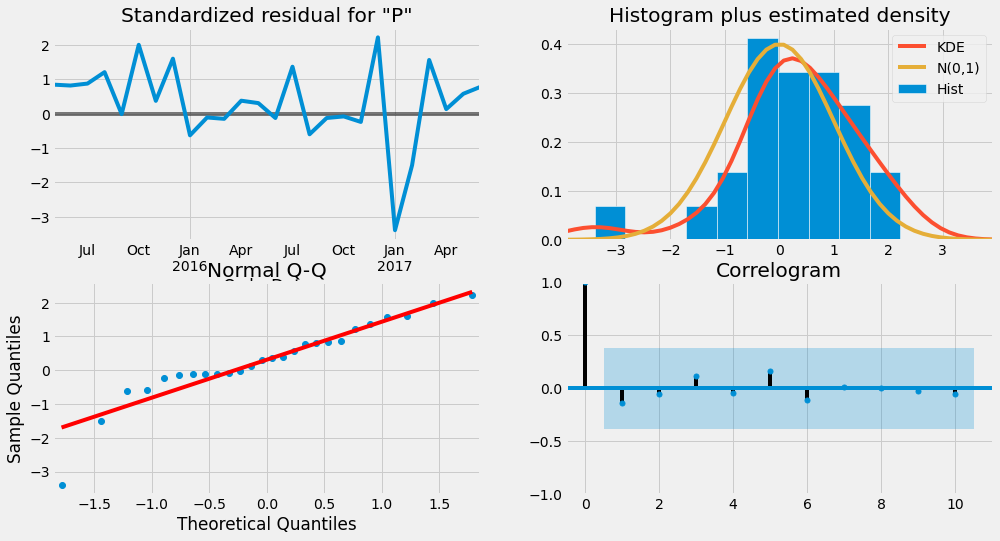

In [205]:
# Try different combinations of (p, d, q) parameters
# Example: ARIMA(4, 2, 4) model
model = ARIMA(monthly_profit, order=(4, 4, 4))
fitted_model = model.fit()
print(fitted_model.summary())

# Compare models using AIC or BIC
print('AIC:', fitted_model.aic)
print('BIC:', fitted_model.bic)

# Plot diagnostics for the fitted model
fitted_model.plot_diagnostics(figsize=(15, 8))
plt.show()


In [206]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Add seasonal parameters (P, D, Q, s) for seasonal ARIMA
# Example: SARIMA(1, 1, 1)(1, 1, 1, 12) model for monthly data with yearly seasonality
model = SARIMAX(monthly_profit, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()
print(fitted_model.summary())


C:\Users\mark.hanson\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Profit   No. Observations:                   30
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -214.343
Date:                            Tue, 30 Apr 2024   AIC                            438.687
Time:                                    10:42:12   BIC                            442.853
Sample:                                01-31-2015   HQIC                           439.101
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.041     24.150      0.000       0.919       1.081
ma.L1         -0.9737      0.924   

In [207]:
# Compare models using AIC or BIC
print('AIC:', fitted_model.aic)
print('BIC:', fitted_model.bic)


AIC: 438.6865649636881
BIC: 442.8526316839692


In [208]:
# Identify and handle outliers/anomalies in the data
# Example: Remove outliers using winsorization
from scipy.stats import mstats
monthly_profit_winsorized = mstats.winsorize(monthly_profit, limits=[0.05, 0.05])

monthly_profit_winsorized

masked_array(data=[235814.0303, 212186.6893, 259084.5226, 263031.3418,
                   266275.7522, 270067.512 , 196682.7944, 218355.4683,
                   140516.1465, 168581.7648, 140516.1465, 236830.3289,
                   182044.3796, 200044.3727, 199611.0413, 209521.6975,
                   233013.0757, 227745.0372, 339031.0171, 332998.5187,
                   395772.2129, 425643.475 , 467879.7549, 671091.4718,
                   524713.5967, 551314.2274, 596195.0606, 625767.9604,
                   731892.5288, 731892.5288],
             mask=False,
       fill_value=1e+20)

In [209]:
# Identify and handle outliers/anomalies in the data
# Example: Remove outliers using winsorization
from scipy.stats import mstats

# Assuming monthly_profit is already defined
monthly_profit_winsorized = mstats.winsorize(monthly_profit, limits=[0.05, 0.05])

# Format and print the winsorized data
print([f'{value:,.2f}' for value in monthly_profit_winsorized])


['235,814.03', '212,186.69', '259,084.52', '263,031.34', '266,275.75', '270,067.51', '196,682.79', '218,355.47', '140,516.15', '168,581.76', '140,516.15', '236,830.33', '182,044.38', '200,044.37', '199,611.04', '209,521.70', '233,013.08', '227,745.04', '339,031.02', '332,998.52', '395,772.21', '425,643.48', '467,879.75', '671,091.47', '524,713.60', '551,314.23', '596,195.06', '625,767.96', '731,892.53', '731,892.53']


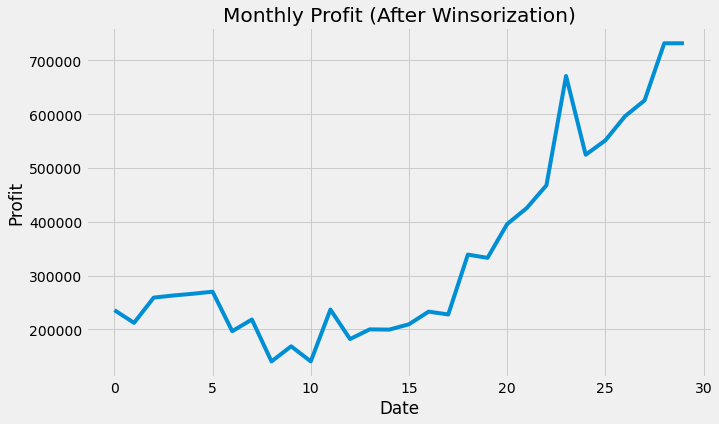

In [210]:
# Before winsorization
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit)
plt.title('Monthly Profit (Before Winsorization)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

# Winsorization
from scipy.stats import mstats
monthly_profit_winsorized = mstats.winsorize(monthly_profit, limits=[0.05, 0.05])

# After winsorization
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit_winsorized)
plt.title('Monthly Profit (After Winsorization)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA Forecast: 2017-07-31     910,702.36
2017-08-31     920,028.37
2017-09-30   1,024,860.15
2017-10-31   1,072,865.27
2017-11-30   1,146,563.15
2017-12-31   1,372,944.78
2018-01-31   1,274,850.37
2018-02-28   1,316,362.30
2018-03-31   1,392,553.00
2018-04-30   1,443,141.98
2018-05-31   1,576,324.81
2018-06-30   1,620,309.58
Freq: M, Name: predicted_mean, dtype: float64


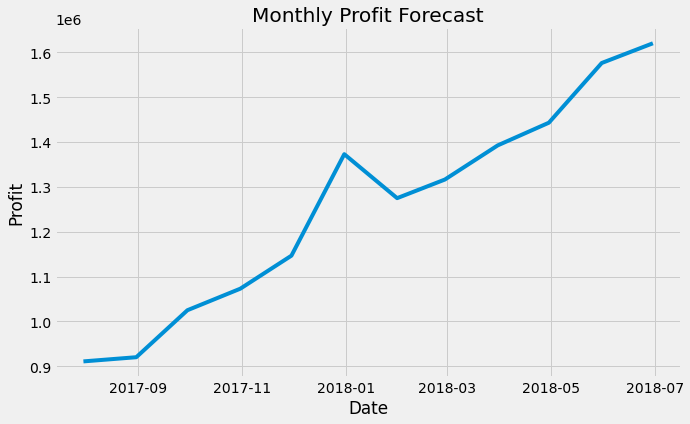

In [216]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(monthly_profit, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fitted_model = sarima_model.fit()

# Forecast
forecast_steps = 12  # Example: Forecasting for the next 12 months
sarima_forecast = sarima_fitted_model.forecast(steps=forecast_steps)

print('SARIMA Forecast:', sarima_forecast)

# build line chart
plt.figure(figsize=(10, 6))
plt.plot(sarima_forecast)
plt.title('Monthly Profit Forecast')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()


In [85]:
# %pip install mlxtend


In [86]:
df1 = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')
df1.head()

OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2015   9/21/2001     SO45080         332        14657             1   
1  1/1/2015   12/5/2001     SO45079         312        29255             4   
2  1/1/2015  10/29/2001     SO45082         350        11455             9   
3  1/1/2015  11/16/2001     SO45081         338        26782             6   
4  1/2/2015  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  \
0              1              1                      2  BK-R50B-58   
1              1              1                      2  BK-R93R-48   
2              1              1                      1  BK-M82B-44   
3              1              1                      2  BK-R50B-44   
4              1              1                      2  BK-R93R-48   

              ProductName     ModelName  \
0      Road-650 Black, 58      Road-650   
1        Road-150 Red, 48      Road-150   
2  Mountain-100 Black, 44  Mountain-100   
3      Road-650 Black, 44      Road-650   
4        Road-150 Red, 48      Road-150   

                                  ProductDescription ProductColor ProductSize  \
0  Value-priced bike with many features of our to...        Black          58   
1  This bike is ridden by race winners. Developed...          Red          48   
2  Top-of-the-line competition mountain bike. Per...        Black          44   
3  Value-priced bike with many features of our to...        Black          44   
4  This bike is ridden by race winners. Developed...          Red          48   

  ProductStyle  ProductCost  ProductPrice SubcategoryName  ProductCategoryKey  \
0            U       413.15        699.10      Road Bikes                   1   
1            U     2,171.29      3,578.27      Road Bikes                   1   
2            U     1,898.09      3,374.99  Mountain Bikes                   1   
3            U       413.15        699.10      Road Bikes                   1   
4            U     2,171.29      3,578.27      Road Bikes                   1   

           Region         Country      Continent CategoryName  FirstName  \
0       Northwest   United States  North America        Bikes       JOHN   
1       Southwest   United States  North America        Bikes       KYLE   
2       Australia       Australia        Pacific        Bikes       ROSS   
3          Canada          Canada  North America        Bikes       SETH   
4  United Kingdom  United Kingdom         Europe        Bikes  ALEJANDRO   

     LastName   BirthDate MaritalStatus Gender  \
0      THOMAS  11/11/1958             M      M   
1  WASHINGTON   4/11/1955             S      M   
2        SANZ   4/21/1974             M      M   
3       LEWIS   9/25/1980             S      M   
4        CHEN   1/11/1965             S      M   

                     EmailAddress  AnnualIncome  TotalChildren  \
0      john48@adventure-works.com     80,000.00           1.00   
1       kyle8@adventure-works.com     80,000.00           3.00   
2      ross38@adventure-works.com    100,000.00           0.00   
3      seth20@adventure-works.com     30,000.00           0.00   
4  alejandro4@adventure-works.com     20,000.00           2.00   

    EducationLevel      Occupation HomeOwner  
0  Partial College  Skilled Manual         N  
1  Partial College    Professional         N  
2      High School      Management         Y  
3      High School  Skilled Manual         N  
4      High School          Manual         Y

In [87]:
df1['single_transaction'] = df1['CustomerKey'].astype(str) + '_' + df1['OrderDate'].astype(str)

df1.head()

OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2015   9/21/2001     SO45080         332        14657             1   
1  1/1/2015   12/5/2001     SO45079         312        29255             4   
2  1/1/2015  10/29/2001     SO45082         350        11455             9   
3  1/1/2015  11/16/2001     SO45081         338        26782             6   
4  1/2/2015  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  \
0              1              1                      2  BK-R50B-58   
1              1              1                      2  BK-R93R-48   
2              1              1                      1  BK-M82B-44   
3              1              1                      2  BK-R50B-44   
4              1              1                      2  BK-R93R-48   

              ProductName     ModelName  \
0      Road-650 Black, 58      Road-650   
1        Road-150 Red, 48      Road-150   
2  Mountain-100 Black, 44  Mountain-100   
3      Road-650 Black, 44      Road-650   
4        Road-150 Red, 48      Road-150   

                                  ProductDescription ProductColor ProductSize  \
0  Value-priced bike with many features of our to...        Black          58   
1  This bike is ridden by race winners. Developed...          Red          48   
2  Top-of-the-line competition mountain bike. Per...        Black          44   
3  Value-priced bike with many features of our to...        Black          44   
4  This bike is ridden by race winners. Developed...          Red          48   

  ProductStyle  ProductCost  ProductPrice SubcategoryName  ProductCategoryKey  \
0            U       413.15        699.10      Road Bikes                   1   
1            U     2,171.29      3,578.27      Road Bikes                   1   
2            U     1,898.09      3,374.99  Mountain Bikes                   1   
3            U       413.15        699.10      Road Bikes                   1   
4            U     2,171.29      3,578.27      Road Bikes                   1   

           Region         Country      Continent CategoryName  FirstName  \
0       Northwest   United States  North America        Bikes       JOHN   
1       Southwest   United States  North America        Bikes       KYLE   
2       Australia       Australia        Pacific        Bikes       ROSS   
3          Canada          Canada  North America        Bikes       SETH   
4  United Kingdom  United Kingdom         Europe        Bikes  ALEJANDRO   

     LastName   BirthDate MaritalStatus Gender  \
0      THOMAS  11/11/1958             M      M   
1  WASHINGTON   4/11/1955             S      M   
2        SANZ   4/21/1974             M      M   
3       LEWIS   9/25/1980             S      M   
4        CHEN   1/11/1965             S      M   

                     EmailAddress  AnnualIncome  TotalChildren  \
0      john48@adventure-works.com     80,000.00           1.00   
1       kyle8@adventure-works.com     80,000.00           3.00   
2      ross38@adventure-works.com    100,000.00           0.00   
3      seth20@adventure-works.com     30,000.00           0.00   
4  alejandro4@adventure-works.com     20,000.00           2.00   

    EducationLevel      Occupation HomeOwner single_transaction  
0  Partial College  Skilled Manual         N     14657_1/1/2015  
1  Partial College    Professional         N     29255_1/1/2015  
2      High School      Management         Y     11455_1/1/2015  
3      High School  Skilled Manual         N     26782_1/1/2015  
4      High School          Manual         Y     14947_1/2/2015

In [88]:
df2 = pd.crosstab(df1['single_transaction'], df1['ProductName'])

df2.head()

ProductName         AWC Logo Cap  All-Purpose Bike Stand  \
single_transaction                                         
11000_11/4/2016                0                       0   
11000_7/22/2016                0                       0   
11001_6/12/2017                0                       0   
11001_7/20/2016                1                       0   
11002_7/4/2016                 0                       0   

ProductName         Bike Wash - Dissolver  Classic Vest, L  Classic Vest, M  \
single_transaction                                                            
11000_11/4/2016                         0                0                0   
11000_7/22/2016                         0                0                0   
11001_6/12/2017                         0                0                0   
11001_7/20/2016                         0                0                0   
11002_7/4/2016                          0                0                0   

ProductName         Classic Vest, S  Fender Set - Mountain  HL Mountain Tire  \
single_transaction                                                             
11000_11/4/2016                   0                      0                 0   
11000_7/22/2016                   0                      1                 0   
11001_6/12/2017                   0                      0                 0   
11001_7/20/2016                   0                      1                 0   
11002_7/4/2016                    0                      0                 0   

ProductName         HL Road Tire  Half-Finger Gloves, L  \
single_transaction                                        
11000_11/4/2016                0                      0   
11000_7/22/2016                0                      0   
11001_6/12/2017                0                      0   
11001_7/20/2016                0                      0   
11002_7/4/2016                 0                      0   

ProductName         Half-Finger Gloves, M  Half-Finger Gloves, S  \
single_transaction                                                 
11000_11/4/2016                         0                      0   
11000_7/22/2016                         0                      0   
11001_6/12/2017                         0                      0   
11001_7/20/2016                         0                      0   
11002_7/4/2016                          0                      0   

ProductName         Hitch Rack - 4-Bike  Hydration Pack - 70 oz.  \
single_transaction                                                 
11000_11/4/2016                       0                        0   
11000_7/22/2016                       0                        0   
11001_6/12/2017                       0                        0   
11001_7/20/2016                       0                        0   
11002_7/4/2016                        0                        0   

ProductName         LL Mountain Tire  LL Road Tire  \
single_transaction                                   
11000_11/4/2016                    0             0   
11000_7/22/2016                    0             0   
11001_6/12/2017                    0             0   
11001_7/20/2016                    0             0   
11002_7/4/2016                     0             0   

ProductName         Long-Sleeve Logo Jersey, L  Long-Sleeve Logo Jersey, M  \
single_transaction                                                           
11000_11/4/2016                              0                           0   
11000_7/22/2016                              0                           0   
11001_6/12/2017                              0                           0   
11001_7/20/2016                              0                           0   
11002_7/4/2016                               0                           0   

ProductName         Long-Sleeve Logo Jersey, S  Long-Sleeve Logo Jersey, XL  \
single_transaction                                                            
11000_11/4/2

In [89]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df2.applymap(encode)


In [90]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [91]:
frequent_itemsets = apriori(basket_input, min_support = 0.001, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = 'lift')

rules.head()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents              consequents  antecedent support  \
0       (Fender Set - Mountain)           (AWC Logo Cap)                0.08   
1                (AWC Logo Cap)  (Fender Set - Mountain)                0.08   
2                (AWC Logo Cap)           (LL Road Tire)                0.08   
3                (LL Road Tire)           (AWC Logo Cap)                0.04   
4  (Long-Sleeve Logo Jersey, L)           (AWC Logo Cap)                0.02   

   consequent support  support  confidence  lift  leverage  conviction  \
0                0.08     0.01        0.07  0.90     -0.00        0.99   
1                0.08     0.01        0.07  0.90     -0.00        0.99   
2                0.04     0.00        0.04  1.01      0.00        1.00   
3                0.08     0.00        0.08  1.01      0.00        1.00   
4                0.08     0.00        0.17  2.13      0.00        1.11   

   zhangs_metric  
0          -0.11  
1          -0.11  
2           0.01  
3           0.01  
4           0.54

In [92]:
rules.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head()


antecedents              consequents  antecedent support  \
439   (Mountain Bottle Cage)  (Water Bottle - 30 oz.)                0.08   
438  (Water Bottle - 30 oz.)   (Mountain Bottle Cage)                0.16   
567       (Road Bottle Cage)  (Water Bottle - 30 oz.)                0.07   
566  (Water Bottle - 30 oz.)       (Road Bottle Cage)                0.16   
180       (HL Mountain Tire)     (Mountain Tire Tube)                0.05   

     consequent support  support  confidence  lift  leverage  conviction  \
439                0.16     0.06        0.83  5.26      0.05        5.07   
438                0.08     0.06        0.40  5.26      0.05        1.53   
567                0.16     0.06        0.89  5.60      0.05        7.51   
566                0.07     0.06        0.37  5.60      0.05        1.49   
180                0.11     0.04        0.69  6.05      0.03        2.82   

     zhangs_metric  
439           0.88  
438           0.96  
567           0.88  
566           0.98  
180           0.88

In [93]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Prepare the data for market basket analysis
# We'll use 'ProductName' as our item identifier
# Group by 'OrderNumber' to create transactions
transactions = df.groupby('OrderNumber')['ProductName'].apply(list)


In [94]:
# Transform the dataset into a format suitable for market basket analysis
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by lift
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Display the top 10 rules
print(rules.head(10))


                                       antecedents  \
61                                  (Touring Tire)   
60                             (Touring Tire Tube)   
62  (Fender Set - Mountain, Water Bottle - 30 oz.)   
67                          (Mountain Bottle Cage)   
12                                  (HL Road Tire)   
13                                (Road Tire Tube)   
30                                (Road Tire Tube)   
31                                  (ML Road Tire)   
8                               (HL Mountain Tire)   
9                             (Mountain Tire Tube)   

                                       consequents  antecedent support  \
61                             (Touring Tire Tube)                0.03   
60                                  (Touring Tire)                0.05   
62                          (Mountain Bottle Cage)                0.01   
67  (Fender Set - Mountain, Water Bottle - 30 oz.)                0.08   
12                                (

In [95]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
#magic function for inline charts in notebook
%matplotlib inline
# for chart style from matplotlib
plt.style.use('fivethirtyeight')


In [96]:
df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')
df.head()


OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2015   9/21/2001     SO45080         332        14657             1   
1  1/1/2015   12/5/2001     SO45079         312        29255             4   
2  1/1/2015  10/29/2001     SO45082         350        11455             9   
3  1/1/2015  11/16/2001     SO45081         338        26782             6   
4  1/2/2015  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  \
0              1              1                      2  BK-R50B-58   
1              1              1                      2  BK-R93R-48   
2              1              1                      1  BK-M82B-44   
3              1              1                      2  BK-R50B-44   
4              1              1                      2  BK-R93R-48   

              ProductName     ModelName  \
0      Road-650 Black, 58      Road-650   
1        Road-150 Red, 48      Road-150   
2  Mountain-100 Black, 44  Mountain-100   
3      Road-650 Black, 44      Road-650   
4        Road-150 Red, 48      Road-150   

                                  ProductDescription ProductColor ProductSize  \
0  Value-priced bike with many features of our to...        Black          58   
1  This bike is ridden by race winners. Developed...          Red          48   
2  Top-of-the-line competition mountain bike. Per...        Black          44   
3  Value-priced bike with many features of our to...        Black          44   
4  This bike is ridden by race winners. Developed...          Red          48   

  ProductStyle  ProductCost  ProductPrice SubcategoryName  ProductCategoryKey  \
0            U       413.15        699.10      Road Bikes                   1   
1            U     2,171.29      3,578.27      Road Bikes                   1   
2            U     1,898.09      3,374.99  Mountain Bikes                   1   
3            U       413.15        699.10      Road Bikes                   1   
4            U     2,171.29      3,578.27      Road Bikes                   1   

           Region         Country      Continent CategoryName  FirstName  \
0       Northwest   United States  North America        Bikes       JOHN   
1       Southwest   United States  North America        Bikes       KYLE   
2       Australia       Australia        Pacific        Bikes       ROSS   
3          Canada          Canada  North America        Bikes       SETH   
4  United Kingdom  United Kingdom         Europe        Bikes  ALEJANDRO   

     LastName   BirthDate MaritalStatus Gender  \
0      THOMAS  11/11/1958             M      M   
1  WASHINGTON   4/11/1955             S      M   
2        SANZ   4/21/1974             M      M   
3       LEWIS   9/25/1980             S      M   
4        CHEN   1/11/1965             S      M   

                     EmailAddress  AnnualIncome  TotalChildren  \
0      john48@adventure-works.com     80,000.00           1.00   
1       kyle8@adventure-works.com     80,000.00           3.00   
2      ross38@adventure-works.com    100,000.00           0.00   
3      seth20@adventure-works.com     30,000.00           0.00   
4  alejandro4@adventure-works.com     20,000.00           2.00   

    EducationLevel      Occupation HomeOwner  
0  Partial College  Skilled Manual         N  
1  Partial College    Professional         N  
2      High School      Management         Y  
3      High School  Skilled Manual         N  
4      High School          Manual         Y

In [97]:
# Group by CustomerKey, OrderDate, and ProductKey, and then count occurrences
product_counts = df.groupby(['OrderDate', 'ProductKey']).size().reset_index(name='Count')

# Sort the counts in descending order
product_counts_sorted = product_counts.sort_values(by='Count', ascending=False)

print(product_counts_sorted)


        OrderDate  ProductKey  Count
9192     3/1/2017         477     25
15653   6/11/2017         477     24
17483    6/7/2017         477     23
12740    4/3/2017         477     23
10062   3/21/2017         477     22
11882   4/19/2017         477     22
16684   6/24/2017         477     22
6729    12/3/2016         477     22
5701   12/15/2016         480     21
14553   5/26/2017         477     21
7927    2/18/2017         480     20
20611   9/13/2016         477     20
8698     2/3/2017         477     19
8137    2/20/2017         477     19
14487   5/25/2017         477     19
6471   12/26/2016         477     19
9323    3/11/2017         477     19
9052     2/8/2017         477     18
21943    9/9/2016         477     18
12382   4/25/2017         477     18
5887   12/18/2016         477     18
21678    9/4/2016         477     18
13287    5/1/2017         477     18
8066     2/2/2017         477     18
17578    6/8/2017         528     18
6861   12/31/2016         477     18
1

In [98]:
# Group by CustomerKey, OrderDate, and ProductKey, and then count occurrences
product_counts = df.groupby(['OrderDate', 'ProductName']).size().reset_index(name='Count')

# Sort the counts in descending order
product_counts_sorted = product_counts.sort_values(by='Count', ascending=False)

print(product_counts_sorted)


        OrderDate                      ProductName  Count
9228     3/1/2017            Water Bottle - 30 oz.     25
15691   6/11/2017            Water Bottle - 30 oz.     24
17521    6/7/2017            Water Bottle - 30 oz.     23
12779    4/3/2017            Water Bottle - 30 oz.     23
11920   4/19/2017            Water Bottle - 30 oz.     22
10096   3/21/2017            Water Bottle - 30 oz.     22
6769    12/3/2016            Water Bottle - 30 oz.     22
16718   6/24/2017            Water Bottle - 30 oz.     22
5701   12/15/2016              Patch Kit/8 Patches     21
14582   5/26/2017            Water Bottle - 30 oz.     21
7932    2/18/2017              Patch Kit/8 Patches     20
20638   9/13/2016            Water Bottle - 30 oz.     20
9352    3/11/2017            Water Bottle - 30 oz.     19
14523   5/25/2017            Water Bottle - 30 oz.     19
8727     2/3/2017            Water Bottle - 30 oz.     19
6507   12/26/2016            Water Bottle - 30 oz.     19
8172    2/20/2

In [99]:
# %pip install scikit-learn pandas

In [102]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Prepare the data for market basket analysis
transactions = df.groupby('OrderNumber')['ProductName'].apply(list)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by lift
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Display the top 10 rules
print(rules.head(10))

# Assuming you have a binary target variable for classification
# For demonstration, let's assume 'target' is your binary target variable
# Split the dataset into features (X) and target (y)
X = df.drop('ProductKey', axis=1)
y = df['ProductKey']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc}")


                                       antecedents  \
61                                  (Touring Tire)   
60                             (Touring Tire Tube)   
62  (Fender Set - Mountain, Water Bottle - 30 oz.)   
67                          (Mountain Bottle Cage)   
12                                  (HL Road Tire)   
13                                (Road Tire Tube)   
30                                (Road Tire Tube)   
31                                  (ML Road Tire)   
8                               (HL Mountain Tire)   
9                             (Mountain Tire Tube)   

                                       consequents  antecedent support  \
61                             (Touring Tire Tube)                0.03   
60                                  (Touring Tire)                0.05   
62                          (Mountain Bottle Cage)                0.01   
67  (Fender Set - Mountain, Water Bottle - 30 oz.)                0.08   
12                                (

KeyError: "['ProductKey'] not found in axis"

In [103]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Prepare the data for market basket analysis
transactions = df.groupby('OrderNumber')['ProductName'].apply(list)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by lift
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Display the top 10 rules
print(rules.head(10))


                                       antecedents  \
61                                  (Touring Tire)   
60                             (Touring Tire Tube)   
62  (Fender Set - Mountain, Water Bottle - 30 oz.)   
67                          (Mountain Bottle Cage)   
12                                  (HL Road Tire)   
13                                (Road Tire Tube)   
30                                (Road Tire Tube)   
31                                  (ML Road Tire)   
8                               (HL Mountain Tire)   
9                             (Mountain Tire Tube)   

                                       consequents  antecedent support  \
61                             (Touring Tire Tube)                0.03   
60                                  (Touring Tire)                0.05   
62                          (Mountain Bottle Cage)                0.01   
67  (Fender Set - Mountain, Water Bottle - 30 oz.)                0.08   
12                                (

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [176]:
df_trend = pd.read_csv('AdventureWorks.csv', encoding='latin-1')


In [177]:
df_trend['OrderDate'] = pd.to_datetime(df_trend['OrderDate'])


In [178]:
df_trend.set_index('OrderDate', inplace=True)


In [179]:
df_trend_monthly = df_trend.resample('M').sum()


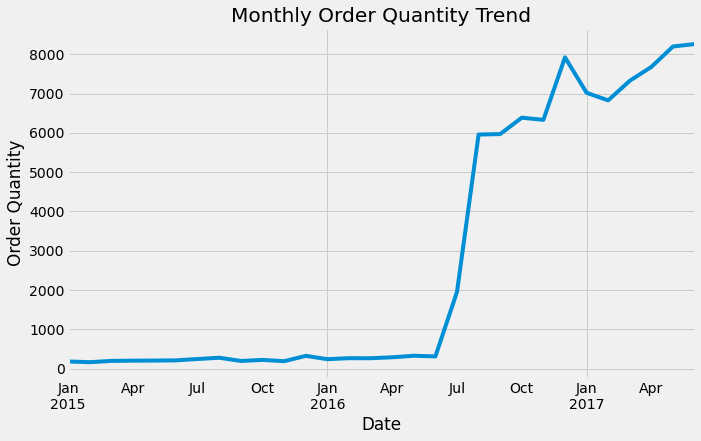

In [180]:
df_trend_monthly['OrderQuantity'].plot(figsize=(10, 6))
plt.title('Monthly Order Quantity Trend')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()


In [181]:
window = 12 # Example window size for a 12-month moving average
df_trend_monthly['OrderQuantity_MA'] = df_trend_monthly['OrderQuantity'].rolling(window=window).mean()


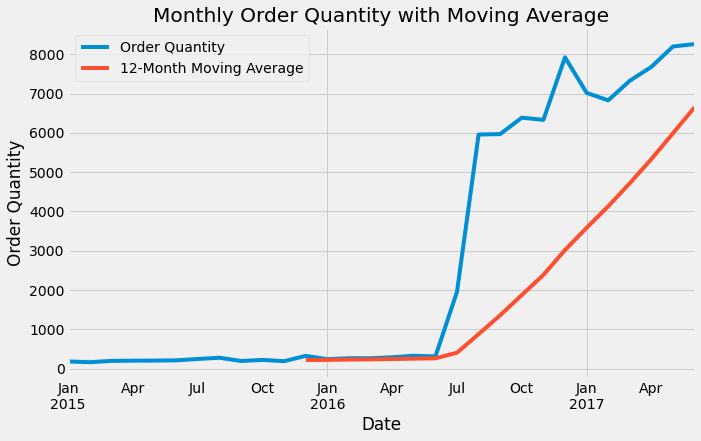

In [182]:
df_trend_monthly[['OrderQuantity', 'OrderQuantity_MA']].plot(figsize=(10, 6))
plt.title('Monthly Order Quantity with Moving Average')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend(['Order Quantity', '12-Month Moving Average'])
plt.show()


In [183]:
df_trend_monthly['MonthIndex'] = range(1, len(df_trend_monthly) + 1)


In [184]:
from sklearn.model_selection import train_test_split

X = df_trend_monthly['MonthIndex'].values.reshape(-1, 1)
y = df_trend_monthly['OrderQuantity_MA'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [185]:
is_nan = np.isnan(y_train)
print(np.any(is_nan))


True


In [186]:
y_train_no_nan = y_train[~is_nan]


In [187]:
X_train_no_nan = X_train[~is_nan]


In [188]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_no_nan, y_train_no_nan)


LinearRegression()

In [189]:
print("Coefficients:", model.coef_)


Coefficients: [361.37690715]


In [190]:
print("Intercept:", model.intercept_)


Intercept: -5330.459240394453


In [191]:
r_squared = model.score(X_train_no_nan, y_train_no_nan)
print("R-squared:", r_squared)


R-squared: 0.8747160425056841


In [192]:
# Assuming X_test is your test data
predictions = model.predict(X_test)
print("Predictions:", predictions)


Predictions: [ 4788.09415992   451.57127407  3342.58653131  1174.32508838
 -2078.06707601 -1716.69016885]


In [193]:
y_pred = model.predict(X_train_no_nan) # Predicting on the training set 


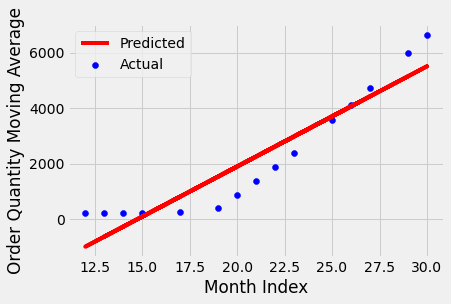

In [194]:
import matplotlib.pyplot as plt

plt.scatter(X_train_no_nan, y_train_no_nan, color='blue', label='Actual')
plt.plot(X_train_no_nan, y_pred, color='red', label='Predicted')
plt.xlabel('Month Index')
plt.ylabel('Order Quantity Moving Average')
plt.legend()
plt.show() 
